<img src="https://raw.githubusercontent.com/5hraddha/ice-video-games-sales-analysis/main/images/banner.png" >

# Contents <a id='contents'></a>

[🔻 Contents](#contents)   
[🔻 Introduction](#introduction)  
[🔻 Project Goal](#project_goal)  
[🔻 Data Description](#data-description)  
[🔻 Libraries Initialization](#libraries-initialization)   
[🔻 Load the data](#load-the-data)   
[🔻 Data Preprocessing](#data-preprocessing)  
-------- [🔹 Get general information](#get-general-information)  
-------- [🔹 Validate column names](#validate-column-names)  
-------- [🔹 Fix column datatypes](#fix-column-datatypes)  
-------- [🔹 Check and Fix missing values](#check-missing-values)  
-------- [🔹 Check and Fix duplicate values](#check-duplicate-values)  
    
[🔻 Feature Engineering](#feature-engineering)  
[🔻 Analyze the data](#analyze-the-data)  
[🔻 Create a user profile for each region](#user-profile-for-each-region)  
[🔻 Testing the hypotheses](#testing-the-hypotheses)  
[🔻 Conclusion](#conclusion)  

# 🔻 Introduction <a id='introduction'></a> 
[← Back to Contents](#contents)

We have dataset given from an online store - **Ice**, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

# 🔻 Project Goal <a id='project_goal'></a>  
[← Back to Contents](#contents)

The project goals are as follows:

🔹 **Identify patterns that determine the success of video games**: By analyzing the available data, we aim to uncover factors that contribute to a game's success, such as user and expert reviews, genres, platforms, and ESRB ratings.  

🔹 **Spot potential big winners**: Through data analysis, we want to identify games that have the potential to be highly successful in terms of sales. By understanding the factors that contribute to success, we can pinpoint games that are likely to perform well and generate significant revenue.  

🔹 **Plan advertising campaigns**: The insights gained from analyzing the data will enable us to plan effective advertising campaigns. By understanding the factors that influence game sales, we can target the right audience and promote games through appropriate channels, maximizing the reach and impact of our campaigns.  

🔹 **Forecast sales for 2017**: Using the data available up until December 2016, we aim to forecast game sales for the upcoming year, 2017. This will allow us to make informed decisions and allocate resources effectively based on projected sales figures.  

Overall, the project aims to leverage data analysis techniques to gain a deep understanding of the video game market, identify successful game attributes, and make data-driven decisions to maximize sales and revenue for Ice, the online store.

# 🔻 Data Description <a id='data-description'></a>  
[← Back to Contents](#contents)

We've been given data in file `datasets/games.csv`. The given csv data file has 11 columns and comma as field separator. The description of the columns are as follows:

| Column Names    	| Description                                                                                                                                	|
|:-----------------	|:--------------------------------------------------------------------------------------------------------------------------------------------	|
| **Name**            	| Name of the game                                                                                                                           	|
| **Platform**        	| Platform of the games release (i.e. PC,PS4, etc.)                                                                                          	|
| **Year_of_Release** 	| The year when the game was released                                                                                                        	|
| **Genre**           	| Genre of the game                                                                                                                          	|
| **NA_sales**        	| North American sales in USD million                                                                                                        	|
| **EU_sales**        	| Sales in Europe in USD million                                                                                                             	|
| **JP_sales**        	| Sales in Japan in USD million                                                                                                              	|
| **Other_sales**     	| Sales in other countries in USD million                                                                                                    	|
| **Critic_Score**    	| Professional critic score given for a game. Maximum of 100.                                                                                	|
| **User_Score**      	| Score given by users for a game. Maximum of 10.                                                                                            	|
| **Rating**          	| Rating given by ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. 	|

# 🔻 Libraries Initialization <a id='libraries-initialization'></a>  
[← Back to Contents](#contents)

To begin with, we need a few libraries for our statistical analysis - `scipy`, `matplotlib`, `pandas` and `numpy`. We'll import all of them so that we can use the functions or methodds provided by them in our analysis:  
🔹 **NumPy**: It is a numerical computing library that provides support for arrays and matrices and mathematical operations that can be performed on them.   

🔹 **Pandas**: It is a data manipulation library that provides functions to read, write and manipulate data in various formats.    

🔹 **SciPy**: It is a library that provides scientific computing functions such as statistical analysis, integration, optimization, and signal processing.   

🔹 **Matplotlib**: It is a plotting library that is used to visualize data in various formats.   

🔹 **Seaborn**: It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  

🔹 **Requests**: It is a library that allows you to send HTTP requests using Python.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import requests

# 🔻 Load the Data <a id='load-the-data'></a>  
[← Back to Contents](#contents)

We have been given the datasets in a file - `games.csv` which is in `/datasets/` directory in `csv` format with comma as field separator. We need to read the data file and load the data into DataFrame - `df_games` using `read_csv()` method provided by `pandas`.

In [2]:
df_games = pd.read_csv('datasets/games.csv')

Great! Now let's have a peek into the data to verify that we've read the data properly and how the data looks like:

In [3]:
# Get first 10 records from the dataframe - df_games
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


It looks like we've read the data properly as intended. Now, let's proceed with data cleansing - identify and fix errors, duplicates, and irrelevant data from the raw dataset.

# 🔻 Data Preprocessing <a id='data-preprocessing'></a>  
[← Back to Contents](#contents)

The **stage of preparing the data**, also known as **data cleansing or data preprocessing**, is an essential step in data analysis. It involves cleaning and transforming the raw data to ensure its quality, consistency, and suitability for analysis. Here are some actions commonly performed during the data cleansing stage, along with their associated benefits:  

🔹 **Removing duplicates**: Identifying and eliminating duplicate records in the dataset ensures that each observation is unique. This helps prevent duplication bias and ensures accurate analysis results.  

🔹 **Handling missing values**: Identifying missing values and deciding how to handle them is crucial. Options include imputing missing values using statistical techniques, removing records with missing values, or considering their impact on the analysis. Proper handling of missing data ensures reliable and unbiased results.    

🔹 **Standardizing and formatting data**: Data may come in different formats or units, making it necessary to standardize the data to ensure consistency. This can involve converting data to a common unit, normalizing values, or transforming variables as required. Standardizing data allows for meaningful comparisons and reduces inconsistencies in the analysis.  

🔹 **Dealing with outliers**: Outliers are data points that significantly deviate from the overall pattern. Identifying and handling outliers appropriately is important to avoid skewing analysis results. Outliers can be treated by removing them if they are erroneous or influential, or by transforming them to minimize their impact on the analysis.  

🔹 **Data validation and verification**: Conducting data validation checks to ensure data integrity and accuracy is essential. This involves verifying data against predefined criteria, cross-checking with external sources, or performing sanity checks to identify any anomalies or discrepancies in the data.  

By performing these data cleansing actions, we can ensure that the data is well-prepared and suitable for analysis, leading to more accurate and meaningful insights.

## 🔹 Get general information <a id='get-general-information'></a>  
[← Back to Contents](#contents)

Let's get the general information of the data in the Dataframe - `df_games`:

In [4]:
# Get general info about the Dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Based on the information we have got from `info()` method about the DataFrame `df_games`, we can draw the following conclusions:  

1. **Overall DataFrame**:

- The DataFrame contains **16,715 entries (rows)**.
- There are **11 columns** representing different attributes of the video games data.
- **Some columns have missing values**, as indicated by the "Non-Null Count" for each column, which is lower than the total number of entries (16,715).
- The DataFrame's **memory usage is 1.4+ MB**.  

2. **Column Conclusions**:  
- **Name**: This column represents the name of the video game. It has 16,713 non-null entries, indicating **two missing values**. The datatype of this column is `object` i.e. string which makes sense.

- **Platform**: This column denotes the platform on which each game was released. It has 16,715 non-null entries, indicating **no missing values**. The datatype of this column is `object` i.e. string which makes sense.

- **Year_of_Release**: This column contains the year of release for each game. It has 16,446 non-null entries, suggesting **some missing values**. The datatype of this column is `float64` but since the value of years will be a positive whole number, we need to check whether it will be safe to convert this column to a `int64` type.

- **Genre**: This column represents the genre of each game. Similar to the "Name" column, it has 16,713 non-null entries, indicating **two missing values**. The datatype of this column is `object` i.e. string which makes sense. We'll see if it is beneficial to convert it to categorical datatype.

- **NA_sales**, **EU_sales**, **JP_sales**, **Other_sales**: These columns display the sales figures in different regions (North America, Europe, Japan, and other regions) for each game. All four columns have 16,715 non-null entries, implying **no missing values**. The datatypes of these columns are `float64`, which makes sense.

- **Critic_Score**: This column represents the aggregated score given by game critics. It has 8,137 non-null entries, indicating **missing values for some games**. The datatype of this column is `float64`, which makes sense.

- **User_Score**: This column denotes the aggregated score given by users. It has 10,014 non-null entries, implying **missing values for some games**. The data type of this column is currently an `object` which should be changed to `float64`.

- **Rating**: This column represents the ESRB rating of each game, indicating the age appropriateness. It has 9,949 non-null entries, suggesting **missing values for some games**. The datatype of this column is `object` i.e. string which makes sense. We'll see if it is beneficial to convert it to categorical datatype.  

It's important to note that further analysis and exploration of the data would be required to gain more insights into each column and assess the quality of the missing values. Additionally, some columns, such as `Year_of_Release` and `User_Score` might need to be converted to the appropriate data types (e.g., integer or float) for further analysis or visualization.

## 🔹 Validate column names <a id='validate-column-names'></a>  
[← Back to Contents](#contents)

Let's check the column names in the Dataframe - `df_games`:

In [5]:
# Get the lost of all the column names
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Let's convert all the column names to lowecase:

In [6]:
# Change the column names from the upper to lower case
df_games.columns = df_games.columns.str.lower()

All the column names are self-explanatory except `rating`. It will be great if we could rename it to `esrb_rating` for more clarity:

In [7]:
# Rename column name
df_games = df_games.rename(columns={'rating': 'esrb_rating'})

Let's finally validate the column names again:

In [8]:
# Get the lost of all the updated column names
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb_rating'],
      dtype='object')

## 🔹 Fix column datatypes <a id='fix-column-datatypes'></a>  
[← Back to Contents](#contents)

We have seen before that the column `year_of_release` is of `float64` datatype. Let's see what are the unique values in the column:

In [9]:
# Get set of unique values in the column - year_of_release
df_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

We have `NaN` value too in the column - `year_of_release`. So, it makes sense for the column to be of `float64` as of now datatype as `NaN` is considered as float in pandas. We can look into it again when we would have gotten rid of all the missing values from the column - `year_of_release`.

Let's look into `user_score` column and see what are the unique values it has:

In [10]:
# Get set of unique values in the column - user_score
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Clearly, the values in the column - `user_score` are float-like (but of string type), except `tbd` and `nan`. Let's first think about `tbd` values. Since, it's value is not defined as `tbd` means 'to be determined', it will be safe to have all the `tbd`s as `NaN`. If we convert the datatype of the column - `user_score` to `float64` using `pd.to_numeric()`, we have an option to convert all the invalid parsings as `NaN` by setting `errors` parameter to `coerce`: 

In [11]:
# Convert datatype of the column to float64
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Let's validate the datatype of the column - `user_score`:

In [12]:
# Get the datatype of the column - user_score
df_games['user_score'].dtype

dtype('float64')

Great! We have successfully corrected the datatypes of the required columns.

## 🔹 Check and Fix missing values <a id='check-missing-values'></a>  
[← Back to Contents](#contents)

Let's first check how many missing values we have in the Dataframe - `df_games` in each column:

In [13]:
# Count number of missing values in all the columns of the dataframe
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
esrb_rating        6766
dtype: int64

### Fix missing values of column - `name` <a id='check-missing-values-name'></a>  
[← Back to Contents](#contents)

As we can see that we have two records in the Dataframe - `df_games` where `name` is missing. Let's get those two records:

In [14]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


So, these two records have missing values for `name`, `genre`, `critic_score`, `user_score` and `esrb_rating` columns. Since, most of the columns except sales are having missing values, we can safely drop these two rows: 

In [15]:
# Drop the rows having missing names
df_games = df_games.drop(df_games[df_games['name'].isna()].index)

Let's validate again that we have successfully deleted the two records with missing names:

In [16]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating


Let's check again how many remaining missing values we have in the Dataframe - `df_games` in each column:

In [17]:
# Count number of missing values in all the columns of the dataframe
df_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
esrb_rating        6764
dtype: int64

### Fix missing values of column - `year_of_release` <a id='check-missing-values-year'></a>  
[← Back to Contents](#contents)

As we have seen earlier that **we have 269 missing values in the column - `year_of_release`**. Let's have a peek into few such records:

In [18]:
df_games[df_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Let's get the list of all the names of games and the platform they were relased, where the `year_of_release` is missing and save it in `games_with_missing_year_of_rel`:

In [19]:
games_with_missing_year_of_rel = df_games.query("year_of_release.isnull()")[['name', 'platform']]
games_with_missing_year_of_rel.head(10)

,name,platform
183,Madden NFL 2004,PS2
377,FIFA Soccer 2004,PS2
456,LEGO Batman: The Videogame,Wii
475,wwe Smackdown vs. Raw 2006,PS2
609,Space Invaders,2600
627,Rock Band,X360
657,Frogger's Adventures: Temple of the Frog,GBA
678,LEGO Indiana Jones: The Original Adventures,Wii
719,Call of Duty 3,Wii
805,Rock Band,Wii


Let's get the set of platforms in Dataframe - `games_with_missing_year_of_rel`:

In [20]:
games_with_missing_year_of_rel['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

Since, year of release is such an information about a video game that is a fact and can be easily available online, we will try to use a web API to fill up the missing values for `year_of_release`- [**MobyGames API**](https://api.mobygames.com/). We will use python's `requests` library to fetch the data of all the games listed in `games_with_missing_year_of_rel` and filter the data using plaform IDs and save the name of the game, platform ID and release date as a new dataframe - `df_games_from_api`.  

Let's create another column - `plaform_api_id` in the dataframe - `games_with_missing_year_of_rel` that could save the platform IDs (as described in the API docs). We'll use this as input to the API endpoint to filter the games data and get release dates:

In [21]:
# Create a new column - plaform_api_id and save value for PS2
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS2', ['platform_id']] = 7
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS2'].head()

,name,platform,platform_id
183,Madden NFL 2004,PS2,7.0
377,FIFA Soccer 2004,PS2,7.0
475,wwe Smackdown vs. Raw 2006,PS2,7.0
1650,NASCAR Thunder 2003,PS2,7.0
1840,Rock Band,PS2,7.0


In [22]:
# Create a new column - plaform_api_id and save value for Wii
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'Wii', ['platform_id']] = 82
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'Wii'].head()

,name,platform,platform_id
456,LEGO Batman: The Videogame,Wii,82.0
678,LEGO Indiana Jones: The Original Adventures,Wii,82.0
719,Call of Duty 3,Wii,82.0
805,Rock Band,Wii,82.0
1609,LEGO Harry Potter: Years 5-7,Wii,82.0


In [23]:
# Create a new column - plaform_api_id and save value for 2600
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == '2600', ['platform_id']] = 28
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == '2600'].head()

,name,platform,platform_id
609,Space Invaders,2600,28.0
1506,Adventure,2600,28.0
1585,Combat,2600,28.0
2106,Air-Sea Battle,2600,28.0
3883,Fishing Derby,2600,28.0


In [24]:
# Create a new column - plaform_api_id and save value for X360
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'X360', ['platform_id']] = 69
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'X360'].head()

,name,platform,platform_id
627,Rock Band,X360,69.0
2132,LEGO Harry Potter: Years 5-7,X360,69.0
2453,The Lord of the Rings: War in the North,X360,69.0
2536,Shaun White Snowboarding,X360,69.0
2969,Test Drive Unlimited 2,X360,69.0


In [25]:
# Create a new column - plaform_api_id and save value for GBA
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GBA', ['platform_id']] = 12
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GBA'].head()

,name,platform,platform_id
657,Frogger's Adventures: Temple of the Frog,GBA,12.0
2773,WarioWare: Twisted!,GBA,12.0
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,12.0
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,12.0
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,12.0


In [26]:
# Create a new column - plaform_api_id and save value for PC
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PC', ['platform_id']] = 3
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PC'].head()

,name,platform,platform_id
1131,Call of Duty: Black Ops,PC,3.0
4648,TERA,PC,3.0
5336,Tomb Raider (2013),PC,3.0
6818,BioShock 2,PC,3.0
7210,LEGO Harry Potter: Years 5-7,PC,3.0


In [27]:
# Create a new column - plaform_api_id and save value for PS3
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS3', ['platform_id']] = 81
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS3'].head()

,name,platform,platform_id
1142,Rock Band,PS3,81.0
2169,Yakuza 4,PS3,81.0
2273,LEGO Harry Potter: Years 5-7,PS3,81.0
2522,The Lord of the Rings: War in the North,PS3,81.0
3233,Test Drive Unlimited 2,PS3,81.0


In [28]:
# Create a new column - plaform_api_id and save value for PS
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS', ['platform_id']] = 6
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PS'].head()

,name,platform,platform_id
1301,Triple Play 99,PS,6.0
1984,Legacy of Kain: Soul Reaver,PS,6.0
5857,The Dukes of Hazzard II: Daisy Dukes It Out,PS,6.0
8150,Twisted Metal: Small Brawl,PS,6.0
8547,Alone in the Dark: The New Nightmare,PS,6.0


In [29]:
# Create a new column - plaform_api_id and save value for PSP
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PSP', ['platform_id']] = 46
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PSP'].head()

,name,platform,platform_id
1538,LEGO Batman: The Videogame,PSP,46.0
2479,Madden NFL 07,PSP,46.0
2572,PES 2009: Pro Evolution Soccer,PSP,46.0
5070,The Golden Compass,PSP,46.0
6476,LEGO Harry Potter: Years 5-7,PSP,46.0


In [30]:
# Create a new column - plaform_api_id and save value for XB
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'XB', ['platform_id']] = 13
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'XB'].head()

,name,platform,platform_id
1699,Hitman 2: Silent Assassin,XB,13.0
2281,Namco Museum,XB,13.0
3223,Metal Gear Solid 2: Substance,XB,13.0
3486,Madden NFL 2002,XB,13.0
3704,Def Jam: Fight for NY,XB,13.0


In [31]:
# Create a new column - plaform_api_id and save value for GB
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GB', ['platform_id']] = 10
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GB'].head()

,name,platform,platform_id
2010,Donkey Kong Land III,GB,10.0


In [32]:
# Create a new column - plaform_api_id and save value for DS
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'DS', ['platform_id']] = 44
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'DS'].head()

,name,platform,platform_id
3081,LEGO Harry Potter: Years 5-7,DS,44.0
3289,Advance Wars: Days of Ruin,DS,44.0
5443,Bejeweled 3,DS,44.0
5932,Shrek the Third,DS,44.0
9664,Charm Girls Club: My Fashion Mall,DS,44.0


In [33]:
# Create a new column - plaform_api_id and save value for GC
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GC', ['platform_id']] = 14
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'GC'].head()

,name,platform,platform_id
3739,NBA Street Vol. 2,GC,14.0
5889,NBA Live 2003,GC,14.0
6019,Nicktoons: Battle for Volcano Island,GC,14.0
6180,"The Chronicles of Narnia: The Lion, The Witch ...",GC,14.0
6199,Pac-Man Fever,GC,14.0


In [34]:
# Create a new column - plaform_api_id and save value for 3DS
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == '3DS', ['platform_id']] = 101
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == '3DS'].head()

,name,platform,platform_id
4818,LEGO Harry Potter: Years 5-7,3DS,101.0
5874,Harvest Moon: The Tale of Two Towns,3DS,101.0
7848,Pet Zombies,3DS,101.0
11377,Face Racers: Photo Finish,3DS,101.0
11455,The Hidden,3DS,101.0


In [35]:
# Create a new column - plaform_api_id and save value for N64
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'N64', ['platform_id']] = 9
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'N64'].head()

,name,platform,platform_id
5492,Custom Robo,N64,9.0
7605,Famista 64,N64,9.0
9151,WCW Backstage Assault,N64,9.0


In [36]:
# Create a new column - plaform_api_id and save value for PSV
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PSV', ['platform_id']] = 105
games_with_missing_year_of_rel.loc[games_with_missing_year_of_rel['platform'] == 'PSV'].head()

,name,platform,platform_id
6293,Disgaea 3: Absence of Detention,PSV,105.0


Awesome! Let's see our dataframe - `games_with_missing_year_of_rel`:

In [37]:
games_with_missing_year_of_rel.head()

,name,platform,platform_id
183,Madden NFL 2004,PS2,7.0
377,FIFA Soccer 2004,PS2,7.0
456,LEGO Batman: The Videogame,Wii,82.0
475,wwe Smackdown vs. Raw 2006,PS2,7.0
609,Space Invaders,2600,28.0


Let's check the dataypes of the columns of the dataframe - `games_with_missing_year_of_rel`:

In [38]:
games_with_missing_year_of_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16522
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         269 non-null    object 
 1   platform     269 non-null    object 
 2   platform_id  269 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


We have no missing values in the dataframe - `games_with_missing_year_of_rel`. Let's change the datatype of `platform_id` to `int64`:

In [39]:
games_with_missing_year_of_rel['platform_id'] = games_with_missing_year_of_rel['platform_id'].astype('int64')
games_with_missing_year_of_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16522
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         269 non-null    object
 1   platform     269 non-null    object
 2   platform_id  269 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB


Great! So, now we have out Dataframe - `games_with_missing_year_of_rel` ready. We can convert it into list of dictionaries so that we could use it as input to our web API to get release dates of games:

In [40]:
list_games_with_missing_year_of_rel = [v for k,v in games_with_missing_year_of_rel.to_dict(orient='index').items()]
list_games_with_missing_year_of_rel[:5]

[{'name': 'Madden NFL 2004', 'platform': 'PS2', 'platform_id': 7},
 {'name': 'FIFA Soccer 2004', 'platform': 'PS2', 'platform_id': 7},
 {'name': 'LEGO Batman: The Videogame', 'platform': 'Wii', 'platform_id': 82},
 {'name': 'wwe Smackdown vs. Raw 2006', 'platform': 'PS2', 'platform_id': 7},
 {'name': 'Space Invaders', 'platform': '2600', 'platform_id': 28}]

Now, let's write a function that we can use to fetch data from the [**MobyGames API**](https://api.mobygames.com/):

In [41]:
# Function to fetch data from api
# API key is free and API requests are limited to 360 per hour
def get_games(name_of_game: str, platform_id: int):
    # Access the API endpoint
    payload = {'api_key':'', 'format': 'normal', 'title': name_of_game, 'platform': platform_id}
    response_data = requests.get('https://api.mobygames.com/v1/games', params=payload).json()
    
    # Declare an empty dict to store the result
    response_game_info = {}
    
    # Get the data from the API response
    if 'games' in response_data:
        if len(response_data['games']) > 0:
            if 'platforms' in response_data['games'][0]:
                for platform_info in response_data['games'][0]['platforms']:
                    if platform_info['platform_id'] == platform_id:
                        response_game_info = { 'platform_id': platform_id, 'name': name_of_game, 'release_date': platform_info['first_release_date']}
    
    return response_game_info                    

We have hit the Web API only once and saved all the data in the `ice_games_from_api.csv` that we can use. Here is the code to hit the Web API:

In [42]:
# import time
# import os.path

# list_games_from_api = []
# # Go over list_games_with_missing_year_of_rel and hit API endpoint for each record and get the release date for game
# for game in list_games_with_missing_year_of_rel:
#     time.sleep(1)
#     response_dict = get_games(game['name'], game['platform_id'])
#     list_games_from_api.append(response_dict)

In [43]:
# # Convert the list of dicts - df_games_from_api to DataFrame - df_games_from_api
# df_games_from_api = pd.DataFrame(data=list_games_from_api)
# df_games_from_api.sample(n=10, random_state=100)

In [44]:
# # Drop all the records with missing values
# df_games_from_api = df_games_from_api.dropna()
# df_games_from_api.sample(n=10, random_state=100)

Great! Now, let's convert the datatype of `release_date` and derive a column - `release_year` to store only the year of game release:

In [45]:
# # Change datatype of release_date to datetime
# df_games_from_api['release_date'] = pd.to_datetime(df_games_from_api['release_date'], format='%Y-%m-%d')
# df_games_from_api.dtypes

In [46]:
# # Get only year from the release_date
# df_games_from_api['release_year'] = df_games_from_api['release_date'].dt.year
# df_games_from_api.head()

Let's save the csv file to our local machine:

In [47]:
# # Save the file as csv
# df_games_from_api[['platform_id', 'name', 'release_date', 'release_year']].to_csv('ice_games_from_api.csv')

I've uploaded the the csv file - `ice_games_from_api.csv` to GitHub so that we can read it anytime from anywhere:

In [48]:
# Read data from csv file
df_games_from_api = pd.read_csv('datasets/ice_games_from_api.csv')
df_games_from_api = df_games_from_api.loc[:, 'platform_id':'release_year']
df_games_from_api.head()

,platform_id,name,release_date,release_year
0,7.0,Madden NFL 2004,2003-08-12,2003
1,7.0,FIFA Soccer 2004,2003-10-15,2003
2,82.0,LEGO Batman: The Videogame,2008-09-23,2008
3,7.0,wwe Smackdown vs. Raw 2006,2005-11-11,2005
4,28.0,Space Invaders,1980-01-01,1980


Now, let's merge the two Dataframes `games_with_missing_year_of_rel` and `df_games_from_api` to get the release years for all the games whose year of release were missing:

In [49]:
games_with_filled_year_of_rel = games_with_missing_year_of_rel.merge(df_games_from_api[['platform_id', 'name', 'release_year']], how='left', on=['platform_id', 'name'])
games_with_filled_year_of_rel.head(10)

,name,platform,platform_id,release_year
0,Madden NFL 2004,PS2,7,2003.0
1,FIFA Soccer 2004,PS2,7,2003.0
2,LEGO Batman: The Videogame,Wii,82,2008.0
3,wwe Smackdown vs. Raw 2006,PS2,7,2005.0
4,Space Invaders,2600,28,1980.0
5,Rock Band,X360,69,2007.0
6,Frogger's Adventures: Temple of the Frog,GBA,12,2001.0
7,LEGO Indiana Jones: The Original Adventures,Wii,82,2008.0
8,Call of Duty 3,Wii,82,2006.0
9,Rock Band,Wii,82,2008.0


Yay! We finally have the release years for the video games from the Web API. Before going ahead, just validating how many misisng values we still have for year of release:

In [50]:
games_with_filled_year_of_rel.isna().sum()

name             0
platform         0
platform_id      0
release_year    73
dtype: int64

Okay! So, let's merge our original Dataframe - `df_games` with the new one - `games_with_filled_year_of_rel` to fill in the missing values. We'll still have 73 missing values for `year_of_release` column. But, that's fine. we've significantly filled in the missing values:

In [51]:
# Replace the missing values in df_games from web api data
df_games = df_games.merge(games_with_filled_year_of_rel[['name', 'platform', 'release_year']], on=['name', 'platform'], how='left', suffixes=("", "_y"))

In [52]:
# Replace nans
df_games['year_of_release'].fillna(df_games['release_year'], inplace=True)

# Drop additional columns resulted from Merge
df_games = df_games.drop(columns=['release_year'])

df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Let's finally see how many remaining missing values we have in `df_games`:

In [53]:
df_games['year_of_release'].isna().sum()

73

That was expected. Let's calculate the percent of data with missing year:

In [54]:
# Calculate percent of data with missing year
(df_games['year_of_release'].isna().sum() / len(df_games.index)) * 100

0.43678573565487944

Now, we've **0.44%** of data with missing year of release in the Dataframe - `df_games`. Let's have a peek into that before we take any further decision:

In [55]:
df_games[df_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
2452,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
2521,The Lord of the Rings: War in the North,PS3,NaN,Action,0.25,0.42,0.01,0.13,63.0,7.0,M
3023,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.0,6.8,E
3351,The Golden Compass,Wii,NaN,Action,0.26,0.28,0.00,0.07,35.0,6.8,E10+
4293,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M
5069,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
5193,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
5293,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,0.15,0.05,0.14,0.01,NaN,NaN,NaN
5335,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5768,Star Wars Jedi Knight II: Jedi Outcast,XB,NaN,Shooter,0.23,0.07,0.00,0.01,81.0,6.8,T


Let's drop the 73 rows where the value of `year_of_release` is still missing in the Dataframe - `df_games` as that accounts for less than half of a percent of values:

In [56]:
# Drop the 73 rows where the value of year_of_release is still missing in df_games
df_games = df_games.dropna(subset=['year_of_release'])

# Print number of rows and columns in df_games
df_games.shape

(16640, 11)

In [57]:
# Check for any missing values in the column - year_of_release
df_games['year_of_release'].isna().sum()

0

Great! So, now we don't have any records in the Dataframe - `df_games` where we have mssing values for `year_of_release` column. Also, we have now **16640 rows and 11 columns** in in `df_games`.

Since we don't have any `NaN` value in the column - `year_of_release` now. So, it makes sense for the column to be of `int64` instead of `float64`. Let's quickly change the datatype:

In [58]:
# Change the datatype from float to int
df_games = df_games.astype({'year_of_release': 'int64'})
df_games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
esrb_rating         object
dtype: object

Awesome! **we now have no missing values for `year_of_release` column and also, the datype of the column is also apt i.e. `int64`**.

### Fix missing values of columns - `critic_score` and `user_score` <a id='check-missing-values-scores'></a>  
[← Back to Contents](#contents)

Let's check how many values are misisng now in Dataframe - `df_games`:

In [59]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8525
user_score         9065
esrb_rating        6720
dtype: int64

Let's focus on `critic_score` and `user_score` columns and see what's the percentage of values that are missing in both the columns:

In [60]:
# Calculate percent of data with missing critic_score
(df_games['critic_score'].isna().sum() / len(df_games.index)) * 100

51.23197115384615

In [61]:
# Calculate percent of data with missing user_score
(df_games['user_score'].isna().sum() / len(df_games.index)) * 100

54.47716346153846

Wow! Around **51.23% of values for `critic_score` column is missing** and around **54.48% of values for `user_score` column is missing**. It's a huge amount. Probably, these games haven't been reviewed yet. **We should not attempt to fill in the missing values as that may affect the data and skew the analysis**.

### Fix missing values of column - `esrb_rating` <a id='check-missing-values-rating'></a>  
[← Back to Contents](#contents)

The **`esrb_rating` column in `df_games` dataset having ratings given by the Entertainment Software Rating Board** whose job is to evaluate a game's content and assign an age rating such as Teen or Mature. Let's check how many unique values we have in `esrb_rating` column in `df_games` dataset.

In [62]:
# Check list of unique values in esrb_rating column
df_games['esrb_rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

According to the [List of ESRB Ratings](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board), the different ratings are as follows:

| **ESRB Rating**                                 | **Description**                                                                                                                                                                                                                                                                                                                                                                                              |
|:-------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Rating Pending (RP)**                         | This symbol is used in promotional materials for games which have not <br>yet been assigned a final rating by the ESRB.                                                                                                                                                                                                                                                                                      |
| **Rating Pending – <br>Likely Mature 17+ (RP)** | This symbol is used in promotional materials for games which have not <br>yet been assigned a final rating by the ESRB, but are anticipated to <br>carry a "Mature 17+" rating.                                                                                                                                                                                                                              |
| **Everyone (E)**                                | Games with this rating contain content that is suitable for all ages. <br>May contain minimal cartoon, fantasy or mild violence and/or the <br>infrequent use of mild language. This rating was initially known as <br>**Kids to Adults** (K-A) until 1998; the ESRB had initially intended <br>to use "E" for the rating, but there were trademark issues with <br>another company over use of an "E" icon. |
| **Everyone 10+ (E10+)**                         | Games with this rating contain content that is suitable for ages 10 <br>and over. May contain more cartoon, fantasy, or mild violence, mild <br>language, and/or minimal suggestive themes.                                                                                                                                                                                                                  |
| **Teen (T)**                                    | Games with this rating contain content that is suitable for ages 13<br> and over. May contain violence, suggestive themes, crude humor, <br>minimal blood, and the infrequent use of strong language.                                                                                                                                                                                                        |
| **Mature 17+ (M)**                              | Games with this rating contain content that is suitable for ages 17<br> and over. May contain intense violence, blood and gore, sexual <br>content, and strong language.                                                                                                                                                                                                                                     |
| **Adults Only 18+ (AO)**                        | Games with this rating contain content that is suitable for ages 18<br> and over.                                                                                                                                                                                                                                                                                                                            |

There is also, one retired rating - **Early Childhood (EC)**. This rating denoted content which is aimed towards a preschool audience. Games with the rating do not contain content that parents would find objectionable to this audience. The EC rating was retired in 2018 due to rarity of use.

So, as per the information above, we could say that **Kids to Adults (K-A)** rating was the old name for **Everyone (E)** until 1998. So, for our convenience we could:  
- First check how many games have rating **Kids to Adults (K-A)**?
- What year of release such games have?
- And eventually convert all the games with **Kids to Adults (K-A)** rating to **Everyone (E)** rating:

In [63]:
# Count how many games have rating Kids to Adults (K-A)
df_games.query("esrb_rating == 'K-A'")['esrb_rating'].count()

3

So, there are **3 records where games ratings are Kids to Adults (K-A)**. Let's peek into the records:

In [64]:
# Get the records where games have rating Kids to Adults (K-A)
df_games.query("esrb_rating == 'K-A'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
902,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16679,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


So, **the 3 records where games have rating Kids to Adults (K-A) are of years 1996 and 1997**. That makes sense as per what we got to know before. So, let's convert the ratings of all the games with **Kids to Adults (K-A)** to **Everyone (E)** rating:

In [65]:
# Convert the ratings of all the games with Kids to Adults (K-A) to Everyone (E) rating
df_games['esrb_rating'] = df_games['esrb_rating'].replace('K-A', 'E')

In [66]:
# Count again how many games have rating Kids to Adults (K-A)
df_games.query("esrb_rating == 'K-A'")['esrb_rating'].count()

0

Great! Now, let's see how many records are there of each rating type:

In [67]:
df_games['esrb_rating'].value_counts(dropna=False)

NaN     6720
E       3986
T       2952
M       1558
E10+    1413
EC         8
RP         2
AO         1
Name: esrb_rating, dtype: int64

So, we have **6720 missing values for `esrb_rating` column** in the dataset - `df_games`. May be these games have not
yet been assigned a final rating by the ESRB. So, we can safely replace all the missing values with **Rating Pending (RP)**:

In [68]:
# Replace all the missing values in the column - esrb_rating with RP
df_games['esrb_rating'] = df_games['esrb_rating'].fillna('RP')

Let's check how many missing values we have in the column - `esrb_rating`:

In [69]:
df_games['esrb_rating'].isna().sum()

0

Great! Now, let's see again how many records are there of each rating type:

In [70]:
df_games['esrb_rating'].value_counts(dropna=False)

RP      6722
E       3986
T       2952
M       1558
E10+    1413
EC         8
AO         1
Name: esrb_rating, dtype: int64

## 🔹 Check and Fix duplicate values <a id='check-duplicate-values'></a>  
[← Back to Contents](#contents)

Let's get the general information of the Dataframe - `df_games` once again:

In [71]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16640 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16640 non-null  object 
 1   platform         16640 non-null  object 
 2   year_of_release  16640 non-null  int64  
 3   genre            16640 non-null  object 
 4   na_sales         16640 non-null  float64
 5   eu_sales         16640 non-null  float64
 6   jp_sales         16640 non-null  float64
 7   other_sales      16640 non-null  float64
 8   critic_score     8115 non-null   float64
 9   user_score       7575 non-null   float64
 10  esrb_rating      16640 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Great! So, we have now **16640 rows and 11 columns** in the dataframe - `df_games`. Let's see if we have any duplicate rows in the dataframe:

In [72]:
# Check for duplicate rows in the dataframe
df_games.duplicated().sum()

0

Great! **We don't have any duplicate rows in the Dataframe - `df_games`.**

### Fix duplicate values of column - `name` <a id='check-duplicate-values-name'></a>  
[← Back to Contents](#contents)

Let's see how many unique values each column has:

In [73]:
# Count unique values in each column
df_games.nunique()

name               11512
platform              31
year_of_release       40
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            95
esrb_rating            7
dtype: int64

Interesting! **The `name` column has `11512` unique values that means there are definetly some duplicate names.** We have already seen that there are different records for the same game on different platforms. So, **let's check if we have records where there are any duplicates for the combination of `name` and `platform`**:

In [74]:
# Check if we have records where there are any duplicates for the combination of name and platform
df_games.duplicated(subset=['name', 'platform']).sum()

4

So, we have 4 records where there are duplicates for the combination of `name` and `platform`. Let's see those records and validate whether they are really duplicates:

In [75]:
df_games[df_games.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4126,Sonic the Hedgehog,PS3,2011,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Woah! So, we got an interesting instance of game - `Madden NFL 13` on platform `PS3`. We have two records for this combination with the same `year_of_release`, `genre`, all scores and `esrb_rating`, except sales. Won't it be apt to sum up the sales for these two almost identical rows and delete the other instance of it. Let's go ahead:

In [76]:
# Sum up the sales for game - Madden NFL 13 and platform - PS3 with indices 604 and 16228
df_games.loc[604, 'eu_sales'] += df_games.loc[16228, 'eu_sales']

In [77]:
# Check the row with index 604
df_games.loc[604]

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
esrb_rating                    E
Name: 604, dtype: object

In [78]:
# Drop the row with index 16228
df_games = df_games.drop([16228])

We're done. Let's check the list of duplicates for the combination of `name` and `platform` again: 

In [79]:
df_games[df_games.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4126,Sonic the Hedgehog,PS3,2011,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


### Fix duplicate values of column - `platform` <a id='check-duplicate-values-platform'></a>  
[← Back to Contents](#contents)

Now, let's inquire the `platform` column. Let's see the list and count of unique values in the column:

In [80]:
df_games['platform'].value_counts(dropna=False)

PS2     2156
DS      2139
PS3     1322
Wii     1309
X360    1252
PSP     1199
PS      1195
PC       970
XB       820
GBA      819
GC       555
3DS      518
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     132
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

The platform names in the list above that we are looking at, based on the provided list, are:

1. PlayStation 2 (PS2)
2. Nintendo DS (DS)
3. PlayStation 3 (PS3)
4. Wii
5. Xbox 360 (X360)
6. PlayStation Portable (PSP)
7. PlayStation (PS)
8. Personal Computer (PC)
9. Xbox (XB)
10. Game Boy Advance (GBA)
11. GameCube (GC)
12. Nintendo 3DS (3DS)
13. PlayStation Vita (PSV)
14. PlayStation 4 (PS4)
15. Nintendo 64 (N64)
16. Xbox One (XOne)
17. Super Nintendo Entertainment System (SNES)
18. Sega Saturn (SAT)
19. Wii U
20. Atari 2600 (2600)
21. Nintendo Entertainment System (NES)
22. Game Boy (GB)
23. Sega Dreamcast (DC)
24. Sega Genesis (GEN)
25. Neo Geo (NG)
26. WonderSwan (WS)
27. Sega CD (SCD)
28. 3DO Interactive Multiplayer (3DO)
29. TurboGrafx-16 (TG16)
30. PC-FX (PCFX)
31. Game Gear (GG)  

**There don't appear to be any duplicates in the platform names**.

We can also make some quick conclusions about the dataset itself, from the data above:

🔹 The dataset includes a variety of gaming platforms spanning several generations, including consoles, handheld devices, and personal computers.

🔹 The PlayStation 2 (PS2) and Nintendo DS (DS) platforms have the highest counts, indicating they are the most prevalent platforms in the dataset.

🔹 The dataset covers popular platforms like the PlayStation 3 (PS3), Wii, Xbox 360 (X360), and PlayStation Portable (PSP), which have a significant number of games released on them.

🔹 PC (Personal Computer) is also represented in the dataset, indicating the presence of PC games.

🔹 There are platforms from various manufacturers, including Sony, Nintendo, Microsoft, Sega, and Atari, among others.

### Fix duplicate values of column - `year_of_release` <a id='check-duplicate-values-year'></a>  
[← Back to Contents](#contents)

Now, let's inquire the `year_of_release` column. Let's see the list and count of unique values in the column:

In [81]:
df_games['year_of_release'].value_counts(dropna=False).sort_index()

1977       3
1978       3
1979       1
1980      15
1981      47
1982      37
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      44
1993      60
1994     121
1995     219
1996     263
1997     291
1998     381
1999     341
2000     352
2001     488
2002     851
2003     791
2004     771
2005     948
2006    1020
2007    1204
2008    1444
2009    1438
2010    1268
2011    1170
2012     659
2013     547
2014     582
2015     606
2016     503
Name: year_of_release, dtype: int64

Based on the counts above, we can have some quick conclusions about the dataset:  

🔹 **Duplicate years**: **There don't appear to be any duplicate years in the list**. Each year value represents a unique year of release.  

🔹 **Missing years**: The list includes **years ranging from 1977 to 2016**. There don't seem to be a missing year in that range.  

🔹 **Distribution of game releases**: The list provides a distribution of the number of game releases across different years. It shows the count of games released in each year, with **higher counts in the mid-2000s to early 2010s**. This suggests that these periods were active in terms of game releases. Conversely, earlier years have relatively lower counts, indicating a smaller number of game releases during those times.  

### Fix duplicate values of column - `genre` <a id='check-duplicate-values-genre'></a>  
[← Back to Contents](#contents)

Now, let's inquire the `genre` column. Let's see the list and count of unique values in the column:

In [82]:
df_games['genre'].value_counts(dropna=False).sort_index()

Action          3355
Adventure       1298
Fighting         845
Misc            1737
Platform         887
Puzzle           579
Racing          1241
Role-Playing    1491
Shooter         1317
Simulation       867
Sports          2343
Strategy         679
Name: genre, dtype: int64

**There don't seem to be any duplicate genre in the Dataframe - `df_games`**. We can also conclude few points from teh counts above:  
🔹 The dataset includes a variety of game genres, providing a diverse range of options for analysis and insights.

🔹 **The most common genre in the dataset is "Action" with 3355 occurrences**, indicating a high number of action-oriented games.

🔹 Other popular genres include "Sports" with 2343 occurrences, "Role-Playing" with 1491 occurrences, "Shooter" with 1317 occurrences, and "Misc" (Miscellaneous) with 1737 occurrences.

🔹 Genres like "Adventure," "Racing," "Simulation," and "Platform" also have a significant number of games represented in the dataset.

🔹 Genres like "Fighting," "Puzzle," and "Strategy" have relatively lower counts compared to the more popular genres but still have a notable presence.

### Fix duplicate values of column - `esrb_rating` <a id='check-duplicate-values-rating'></a>  
[← Back to Contents](#contents)

Now, let's inquire the `esrb_rating` column. Let's see the list and count of unique values in the column:

In [83]:
df_games['esrb_rating'].value_counts(dropna=False).sort_index()

AO         1
E       3985
E10+    1413
EC         8
M       1558
RP      6722
T       2952
Name: esrb_rating, dtype: int64

**There don't seem to be any duplicate `esrb_rating` in the Dataframe - `df_games`**. We can also conclude few points from the counts above:  
🔹 The dataset includes games with various ESRB (Entertainment Software Rating Board) ratings, which indicate the age appropriateness and content of the games.

🔹 The most common ESRB rating in the dataset is "RP" (Rating Pending) with 6722 occurrences. This rating is typically assigned to games that have not yet been assigned a final rating. That means **many of the games in the dataset don't have an ESRB rating yet**.

🔹 The next most prevalent ratings are "E" (Everyone) with 3985 occurrences and "T" (Teen) with 2952 occurrences. These ratings indicate that the games are suitable for all ages and teenagers, respectively.

🔹 "E10+" (Everyone 10 and older) and "M" (Mature) ratings also have a significant presence in the dataset, with 1413 and 1558 occurrences, respectively.

🔹 There are a few games with less common ratings such as "AO" (Adults Only) with 1 occurrence and "EC" (Early Childhood) with 8 occurrences. These ratings represent games targeted at specific age groups.

# 🔻 Feature Engineering <a id='feature-engineering'></a>  
[← Back to Contents](#contents)

Let's have a fresh look at our data in the Dataframe - `df_games`:

In [84]:
# Get first 10 records
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP


In [85]:
# Get last 10 records
df_games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
16703,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,RP
16704,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,T
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,RP
16706,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,RP
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,RP
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,RP
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,RP
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,RP
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,RP
16712,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,RP


We can notice and also confirm from the column description given that **`critic_score` has professional critic scores given for a game with maximum of 100**. And **`user_score` has scores given by users for a game with maximum of 10.** Won't it be great that both the scores be in range of 0 to 10 to make the comparision easy. Let's scale down the values in the `critic_score` by dividing it by 10 and save the values in a new column - `scaled_down_critic_score`:

In [86]:
# Scale down the critic scores and save in a Series - scaled_down_critic_score
scaled_down_critic_score = df_games['critic_score'] / 10

In [87]:
# Insert the Series - scaled_down_critic_score after the critic_score column
df_games.insert(value=scaled_down_critic_score, loc=9, column='scaled_down_critic_score')

In [88]:
# Get first 10 records
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,scaled_down_critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,RP
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.9,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,5.8,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.7,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,RP


Also, let's calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column - `total_sales`:

In [89]:
# Calculate the total sales (the sum of sales in all regions) for each game
total_sales = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales'] 

In [90]:
# Insert the Series - total_sales after the other_sales column
df_games.insert(value=total_sales, loc=8, column='total_sales')

In [91]:
# Get first 10 records
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,scaled_down_critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,RP
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.9,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,5.8,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.7,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,RP


Perfect! Now, we have the Dataframe ready for our analysis. Let's go.

# 🔻 Analyze the data <a id='analyze-the-data'></a>  
[← Back to Contents](#contents)

## 🔹 Number of games released in different years <a id='number-of-games-released'></a>  
[← Back to Contents](#contents)

Let's find out how many games were released in different years:

In [92]:
# Count the number of games released in different years 
games_per_year = df_games.groupby('year_of_release')['name'].count()
games_per_year = games_per_year.reset_index()
games_per_year = games_per_year.rename(columns={'year_of_release': 'Year of Release', 'name': 'Number of Games'})
games_per_year

,Year of Release,Number of Games
0,1977,3
1,1978,3
2,1979,1
3,1980,15
4,1981,47
5,1982,37
6,1983,17
7,1984,14
8,1985,14
9,1986,21


Let's plot a bar chart to visualize the count of the number of games released in different years:

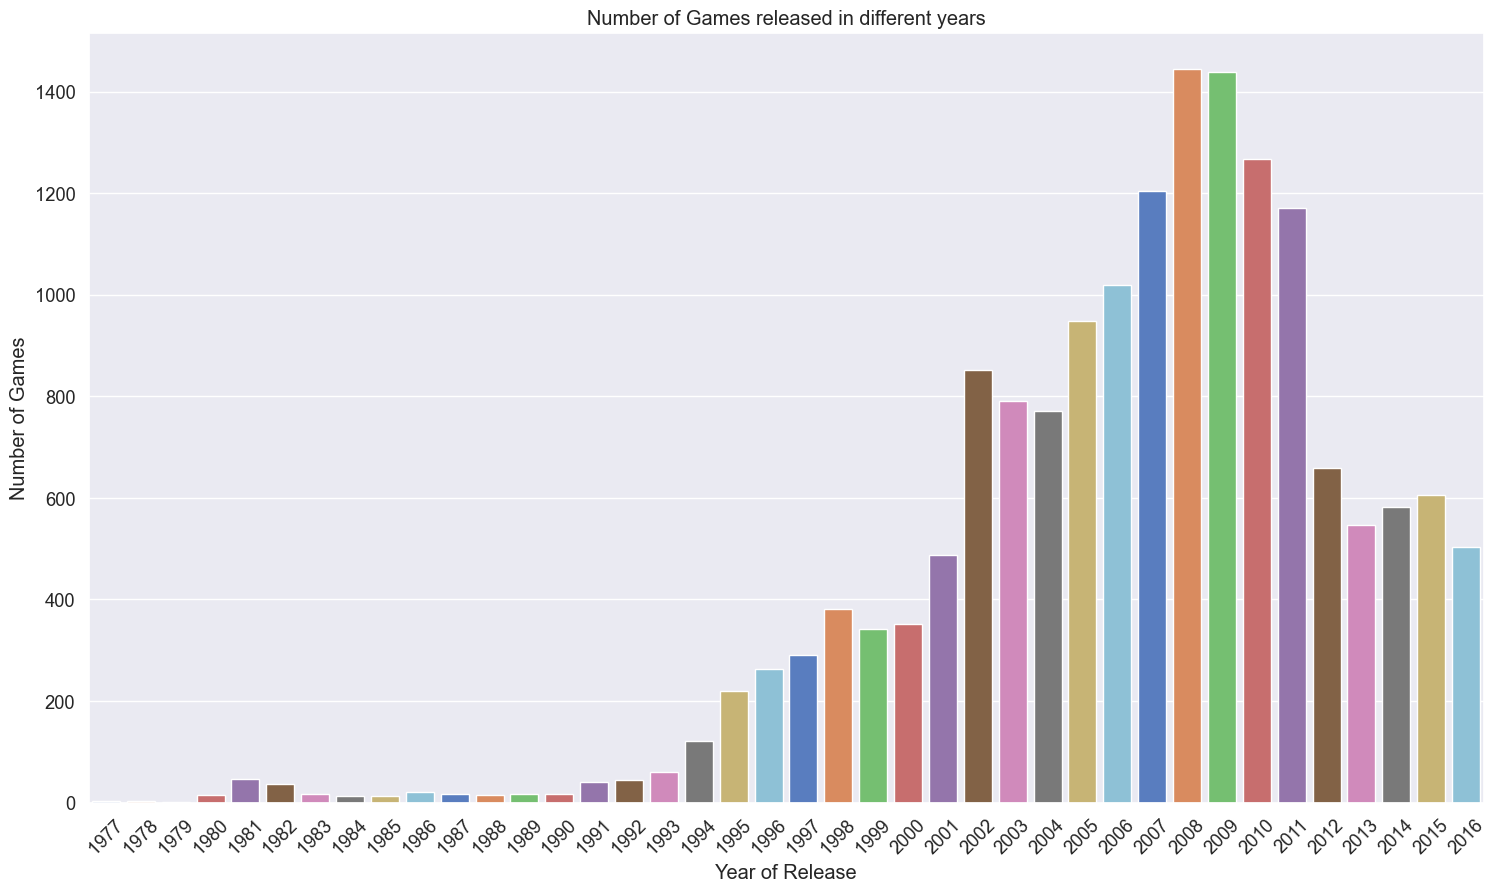

In [93]:
# Set bar plot style properties
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame - games_per_year
ax = sns.barplot(data=games_per_year, x='Year of Release', y='Number of Games', palette='muted')
ax.set(title='Number of Games released in different years')
plt.xticks(rotation = 45)

plt.show()

From the data and the bar plot above, we can try to answer - **Is the data for every period significant?**:  

Looking at the number of games released in different years, we can observe that the number of games released has been increasing over the years, with a few exceptions of lower counts in the earlier years. The data seems to become more significant in terms of the number of games from the late 1990s onwards, with a substantial increase in the number of games released in the 2000s and beyond.  

**While the data for each period may not be equally significant, the increasing number of games released in recent years suggests that the dataset becomes more substantial and potentially more representative of the overall video game market in those years**.

We can derive a few other conclusions on the basis of the data and the graph above:  
🔹 The dataset contains game releases **starting from 1977 up until 2016**. This indicates that the dataset covers a wide range of years and allows for analysis and insights into the video game industry's evolution over several decades.  

🔹 **The number of games released has generally increased over time**, with some fluctuations in certain years. This trend aligns with the growth and popularity of the gaming industry, reflecting the expansion of the market and the increasing number of game developers and publishers.  

🔹 **The period from the late 1990s to the early 2000s marks a significant increase in the number of game releases, indicating a period of rapid growth and innovation in the industry**. It could be as this era saw the emergence of influential consoles like the PlayStation, Nintendo 64, and later, the PlayStation 2, contributing to the rise in game development and releases.  

🔹 The maximum number of games were released in 2008 and 2009.  

**In the context of planning for the 2017 year, it is crucial to focus on more recent years as they hold greater significance and relevance.** Analyzing data from games released in the 1980s would not contribute to the development of an effective plan for 2017. Therefore, we should prioritize the examination of more contemporary years to gain insights that align with the current trends and dynamics of the gaming industry.

## 🔹 Sales variation from platform to platform  <a id='sales-variation'></a>  
[← Back to Contents](#contents)

Let's look at how sales varied from platform to platform and **find out the platforms with the greatest total sales**.

In [94]:
# Get platforms with the greatest total sales
df_popular_platforms = df_games.pivot_table(index='platform', 
                                            values='total_sales', 
                                            aggfunc='sum').sort_values(by='total_sales', ascending=False)
df_popular_platforms

,total_sales
platform,
PS2,1255.12
X360,970.15
PS3,938.48
Wii,905.98
DS,805.44
PS,730.47
GBA,316.53
PS4,314.14
PSP,292.86


Awesome! So, we have data about total sales (in USD million) of 31 platforms sorted in descending order from year 1977 to 2016. For more clearer picture, let's get **the top ten post popular video games platforms** from the Dataframe - `df_popular_platforms`:

In [95]:
# Get top ten platforms with the greatest total sales
df_top_ten_popular_platforms = df_popular_platforms.head(10).reset_index()
df_top_ten_popular_platforms

,platform,total_sales
0,PS2,1255.12
1,X360,970.15
2,PS3,938.48
3,Wii,905.98
4,DS,805.44
5,PS,730.47
6,GBA,316.53
7,PS4,314.14
8,PSP,292.86
9,PC,259.13


Let's plot the Dataframe above - `df_top_ten_popular_platforms` in a bar chart to have a clear visual representation of the top ten post popular video games platforms:

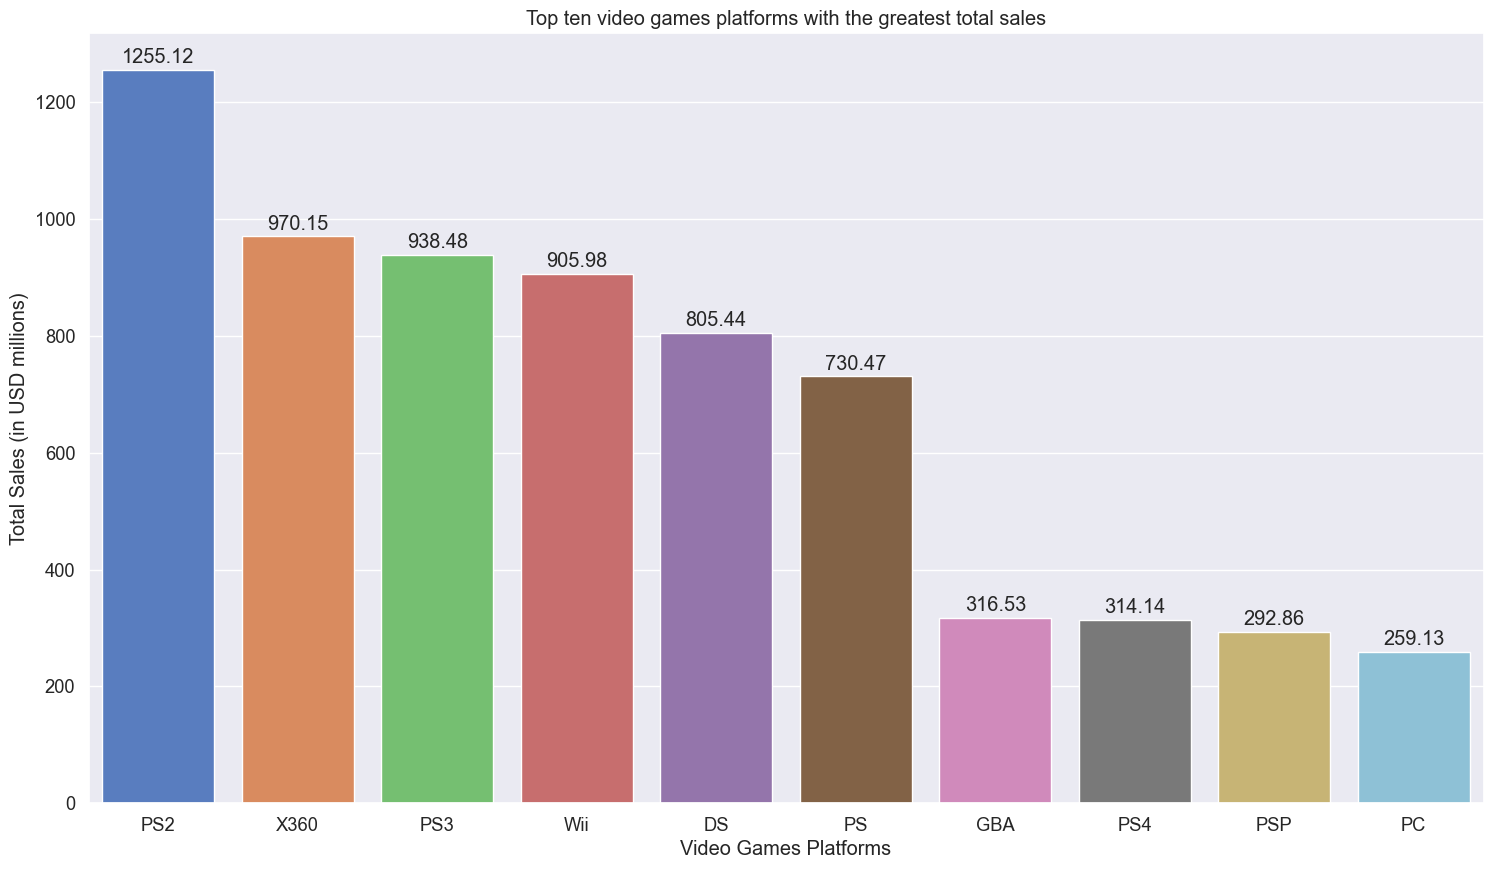

In [96]:
# Set bar plot style properties
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame - df_top_ten_popular_platforms
ax = sns.barplot(data=df_top_ten_popular_platforms, x='platform', y='total_sales', palette='muted')
ax.set(title='Top ten video games platforms with the greatest total sales',
       xlabel='Video Games Platforms', 
       ylabel='Total Sales (in USD millions)')

# Show values on bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

The **PlayStation 2 (PS2) platform has the highest total sales with 1255.12 (in USD million). This indicates the immense popularity and success of the PS2 during its lifespan**. Following the PS2, the Xbox 360 (X360) and PlayStation 3 (PS3) platforms have the second and third highest total sales with 970.15 (in USD million) and 938.48 (in USD million) respectively. These platforms were significant players in the gaming industry and enjoyed substantial sales.  

Great! So, let's dig deep into the data for the top six platforms and analyze **how the total sales was for each of these platforms per year**.

In [97]:
top_six_popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Filter data of top six platforms with the greatest total sales
df_top_six_popular_platforms = df_games.query('platform == @top_six_popular_platforms')

# Get top six platforms with the greatest total sales grouped by year
grpd_top_six_popular_platforms = df_top_six_popular_platforms.groupby(by=['platform', 'year_of_release'])['total_sales'].sum()
df_grpd_top_six_popular_platforms = pd.DataFrame(grpd_top_six_popular_platforms).reset_index()
df_grpd_top_six_popular_platforms

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.91
4,DS,2007,147.23
...,...,...,...
62,X360,2012,100.16
63,X360,2013,88.58
64,X360,2014,34.77
65,X360,2015,11.96


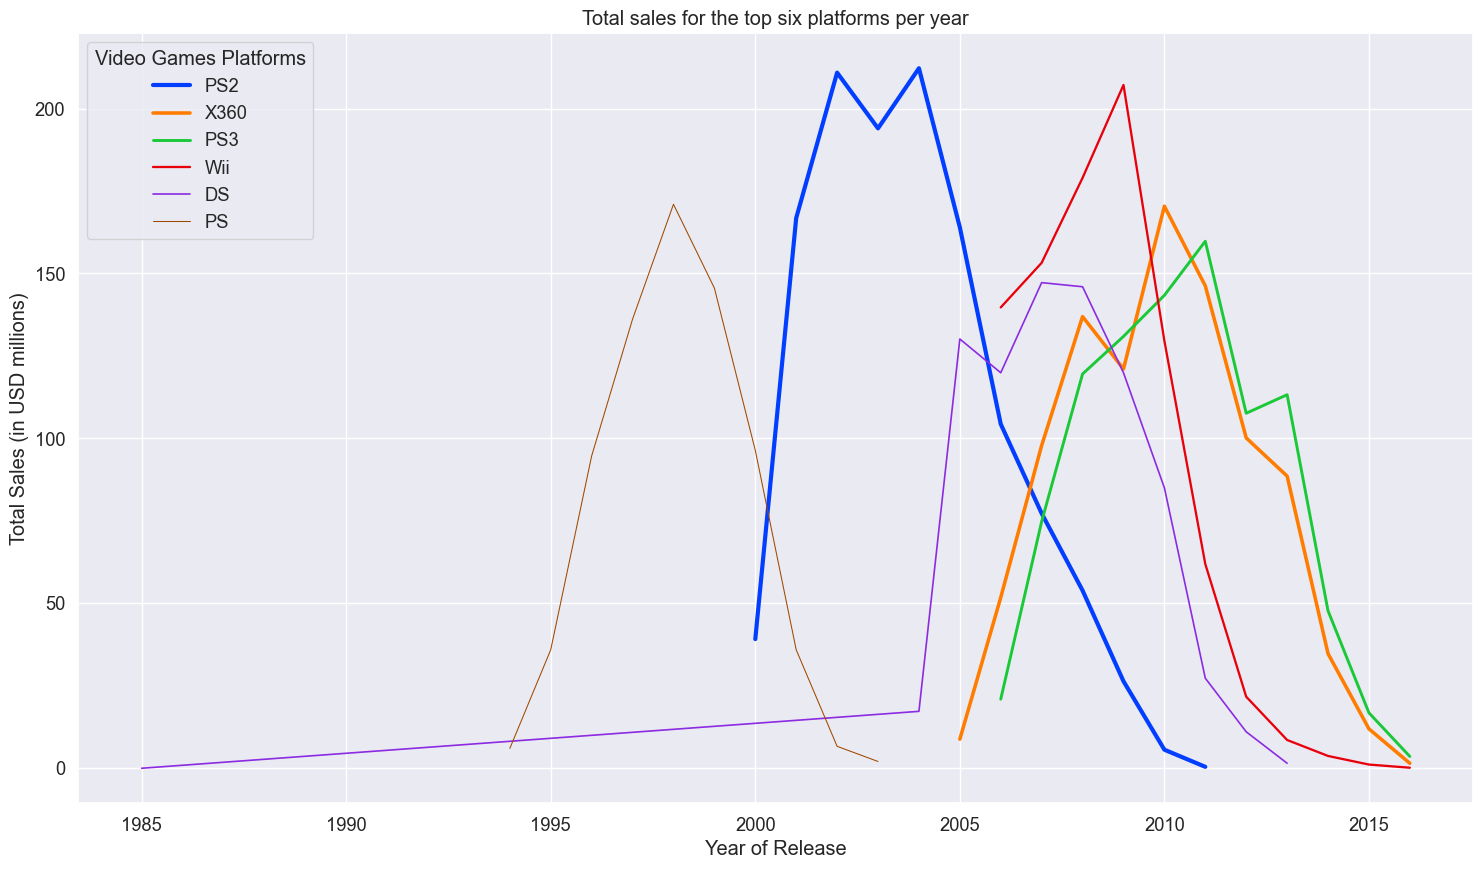

In [98]:
# Set line plot style properties
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a linechart for a DataFrame - df_grpd_top_six_popular_platforms
ax = sns.lineplot(data=df_grpd_top_six_popular_platforms, 
                  x='year_of_release',
                  y='total_sales',
                  hue='platform',
                  hue_order=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'],
                  size='platform',
                  size_order=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'],
                  palette='bright')

ax.set(title='Total sales for the top six platforms per year',
       xlabel='Year of Release', 
       ylabel='Total Sales (in USD millions)')

plt.legend(loc='upper left', title='Video Games Platforms')

plt.show()

Based on the visualization above, **the platforms that used to be popular but now have zero sales are**:  

🔹 **DS**: The DS platform had its last recorded sales in 2013.    
🔹 **PS**: The PS platform had its last recorded sales in 2003.    
🔹 **PS2**: The PS2 platform had its last recorded sales in 2011.  
🔹 **PS3**: The PS3 platform had its last recorded sales in 2016.  
🔹 **Wii**: The Wii platform had its last recorded sales in 2016.    
🔹 **X360**: The X360 platform had its last recorded sales in 2016.    
These platforms were once popular but have since ceased generating sales, indicating their decline in popularity or discontinuation in the market.  

To analyze **the duration of platforms appearing and fading, as well as the lifespan and peak sales of the top six platforms**, we can summarize the conclusions in a tabular format:  

| Platform | First Year | Last Year | Lifespan | Peak Sales Year |
|----------|------------|-----------|----------|-----------------|
| DS       | 1985       | 2013      | 28 years | 2007            |
| PS       | 1994       | 2003      | 9 years  | 1998            |
| PS2      | 2000       | 2011      | 11 years | 2004            |
| PS3      | 2006       | 2016      | 10 years | 2011            |
| Wii      | 2006       | 2016      | 10 years | 2009            |
| X360     | 2005       | 2016      | 11 years | 2010            |

🔹 The **DS platform had the longest lifespan, lasting for 28 years from 1985 to 2013**. Its peak sales occurred in 2007.  
🔹 The PS platform had a lifespan of 9 years from 1994 to 2003, with its peak sales in 1998.  
🔹 The PS2 platform had a lifespan of 11 years from 2000 to 2011, and its peak sales occurred in 2004.  
🔹 The PS3 and Wii platforms both had a lifespan of 10 years, from 2006 to 2016. The peak sales for PS3 and Wii were in 2011 and 2009 respectively, while X360 had a lifespan of 11 years and reached its peak sales in 2010.    

Let's analyze **the duration it takes for platforms to generate meaningful sales and reach their peak sales**. Let's compare the trend between the newer consoles (PS3, Wii, X360) and the older consoles (DS, PS, PS2).  

🔹 **Newer Consoles (PS3, Wii, X360)**:

- The PS3, Wii, and X360 platforms all had **a lifespan of 10 (or 11) years** (from 2006 to 2016).
- It took **approximately 3-4 years for these platforms to start generating meaningful sales**.
- The **peak sales for these platforms occurred between the 4th and 7th year** of their lifespan.  

🔹 **Older Consoles (DS, PS, PS2)**:

- The **DS platform had the longest lifespan of 28 years** (from 1985 to 2013), while **the PS and PS2 platforms had a lifespan of 9 years (from 1994 to 2003) and 11 years (from 2000 to 2011)** respectively.
- It took around **7-10 years for these platforms to start generating meaningful sales**.
- The **peak sales for these platforms occurred between the 6th and 10th year** of their lifespan.  

From these observations, we can conclude that newer consoles tend to generate meaningful sales and reach their peak sales faster than the older consoles. **The newer consoles took around 3-4 years to establish a significant presence in the market, while the older consoles took around 7-10 years**.  

 Now, let's **filter the games platforms that had continuing nonzero sales in 2016** and analyze how the total sales was for each of these platforms per year:

In [99]:
# Filter data of the games platforms that had continuing nonzero sales in 2016 
platforms_having_sales_until_2016 = df_games.query('year_of_release == 2016')['platform']
platforms_having_sales_until_2016 = platforms_having_sales_until_2016.unique().tolist()
platforms_having_sales_until_2016

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

So, now we have **a list of games platforms that had continuing nonzero sales in 2016 - `'PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'`. Let's analyze  how the total sales was for each of these platforms per year**:

In [100]:
# Filter data of the games platforms that had continuing nonzero sales in 2016 
df_platforms_having_sales_until_2016 = df_games.query('platform == @platforms_having_sales_until_2016')

# Get the games platforms that had continuing nonzero sales in 2016, with the total sales grouped by year
grpd_platforms_having_sales_until_2016 = df_platforms_having_sales_until_2016.groupby(by=['platform', 'year_of_release'])['total_sales'].sum()
df_grpd_platforms_having_sales_until_2016 = pd.DataFrame(grpd_platforms_having_sales_until_2016).reset_index()
df_grpd_platforms_having_sales_until_2016

,platform,year_of_release,total_sales
0,3DS,2011,64.25
1,3DS,2012,51.36
2,3DS,2013,56.59
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
80,X360,2016,1.52
81,XOne,2013,18.96
82,XOne,2014,54.07
83,XOne,2015,60.14


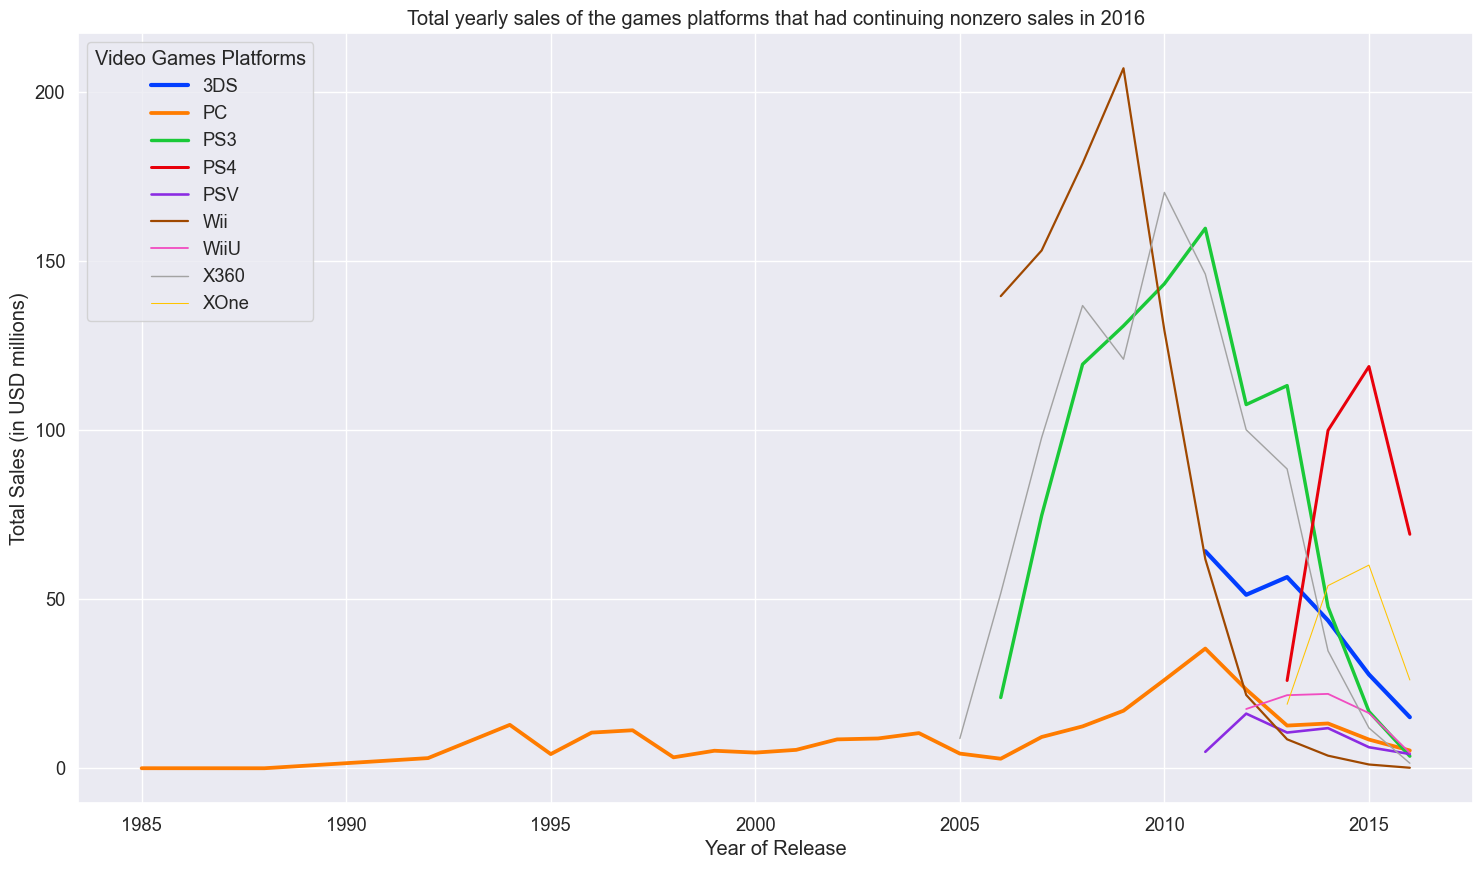

In [101]:
# Set line plot style properties
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a linechart for a DataFrame - df_grpd_platforms_having_sales_until_2016
ax = sns.lineplot(data=df_grpd_platforms_having_sales_until_2016, 
                  x='year_of_release',
                  y='total_sales',
                  hue='platform',
                  size='platform',
                  palette='bright')

ax.set(title='Total yearly sales of the games platforms that had continuing nonzero sales in 2016',
       xlabel='Year of Release', 
       ylabel='Total Sales (in USD millions)')

plt.legend(loc='upper left', title='Video Games Platforms')

plt.show()

Let's analyze the total sales for each of the platforms that had continuing nonzero sales in 2016: 'PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii':  

🔹 **PS4**:

- The PS4 platform was released in 2013 and has shown consistent growth in total sales.
- It experienced a significant increase in sales from 2013 to 2014, followed by relatively stable sales in 2015 and 2016.  

🔹 **3DS**:    

- The 3DS platform was released in 2011 and has shown a decline in total sales over the years.
- It experienced peak sales in 2011 and 2012 but has been gradually decreasing since then.  

🔹 **XOne**:  

- The XOne platform was released in 2013 and has shown growth in total sales.
- It experienced a significant increase in sales from 2013 to 2014, followed by relatively stable sales in 2015 and 2016.  

🔹 **WiiU**:  

- The WiiU platform was released in 2012 and has shown fluctuating total sales over the years.
- It experienced peak sales in 2013 but has been declining since then.  

🔹 **PS3**:

- The PS3 platform was released in 2006 and has shown a decline in total sales over the years.
- It experienced peak sales around 2010-2011 and has been gradually decreasing since then.   

🔹 **PC**:  

- The PC platform has data available from 1985 onwards, indicating its long-standing presence in the gaming industry.
- Total sales for PC games have varied over the years, with fluctuations and no clear trend observed.  

🔹 **X360**:

- The X360 platform was released in 2005 and has shown a decline in total sales over the years.
- It experienced peak sales around 2010-2011 and has been gradually decreasing since then.    

🔹 **PSV**:  

- The PSV platform was released in 2011 and has shown a decline in total sales over the years.  
- It experienced peak sales in its early years but has been decreasing since then.  

🔹 **Wii**:  

- The Wii platform was released in 2006 and has shown a significant decline in total sales over the years.
- It experienced peak sales in its early years but has been consistently decreasing since then.  

From the graph above, **we can evidently see that the period from 2013 to 2016 is where many video games platforms have been competeing in the market. And in order to create a plan for 2017, it will be better to focus more on the data in this range**.

Apart from that, the above graph and the derived conclusions gives a good hint about **potentially profitable platforms**. It looks like the sales for the most of them has been decreasing after their peak sales years. But, it's **PC, Xbox One and PS4** who are having quite stable sales until 2016. We can dig deep into this after selecting the data only for years from 2013 to 2016 to have a more clear overview.

## 🔹 Potentially profitable platforms (2013 - 2016) <a id='profitable-platforms'></a>  
[← Back to Contents](#contents)

Let's disregard the data for the years earlier than 2013 from our Dataframe - `df_games`:

In [102]:
# Disregard the data for the years earlier than 2013
df_games = df_games.query('year_of_release >= 2013')

Awesome! So, let's see how many rows and columns we have now in the Dataframe - `df_games`:

In [103]:
# Get count of rows in the updated Dataframe - df_games
df_games.shape

(2238, 13)

Wow! We have substantially decreased the number of rows we are dealing with. Finally, before proceeding further, let's confirm that we have data only from 2013 to 2016.

In [104]:
# Get list of unique years in the updated Dataframe - df_games
df_games['year_of_release'].unique()

array([2013, 2015, 2014, 2016])

Now, let's analyze how the total sales was for the platforms (in this year range) per year:

In [105]:
grpd_platforms_and_release_year = df_games.groupby(by=['platform', 'year_of_release'])['total_sales'].sum()
df_grpd_platforms_and_release_year = pd.DataFrame(grpd_platforms_and_release_year).reset_index()
df_grpd_platforms_and_release_year

,platform,year_of_release,total_sales
0,3DS,2013,56.59
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.66
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.29
9,PS3,2013,113.25


Awesome! Let's **visualize how the yearly total sales for all the platforms (from data of 2013 - 2016)** to have a concrete insight into the **potentially profitable platforms (2013 - 2016)**, **Which platforms are leading in sales?**, and **Which ones are growing or shrinking?**:

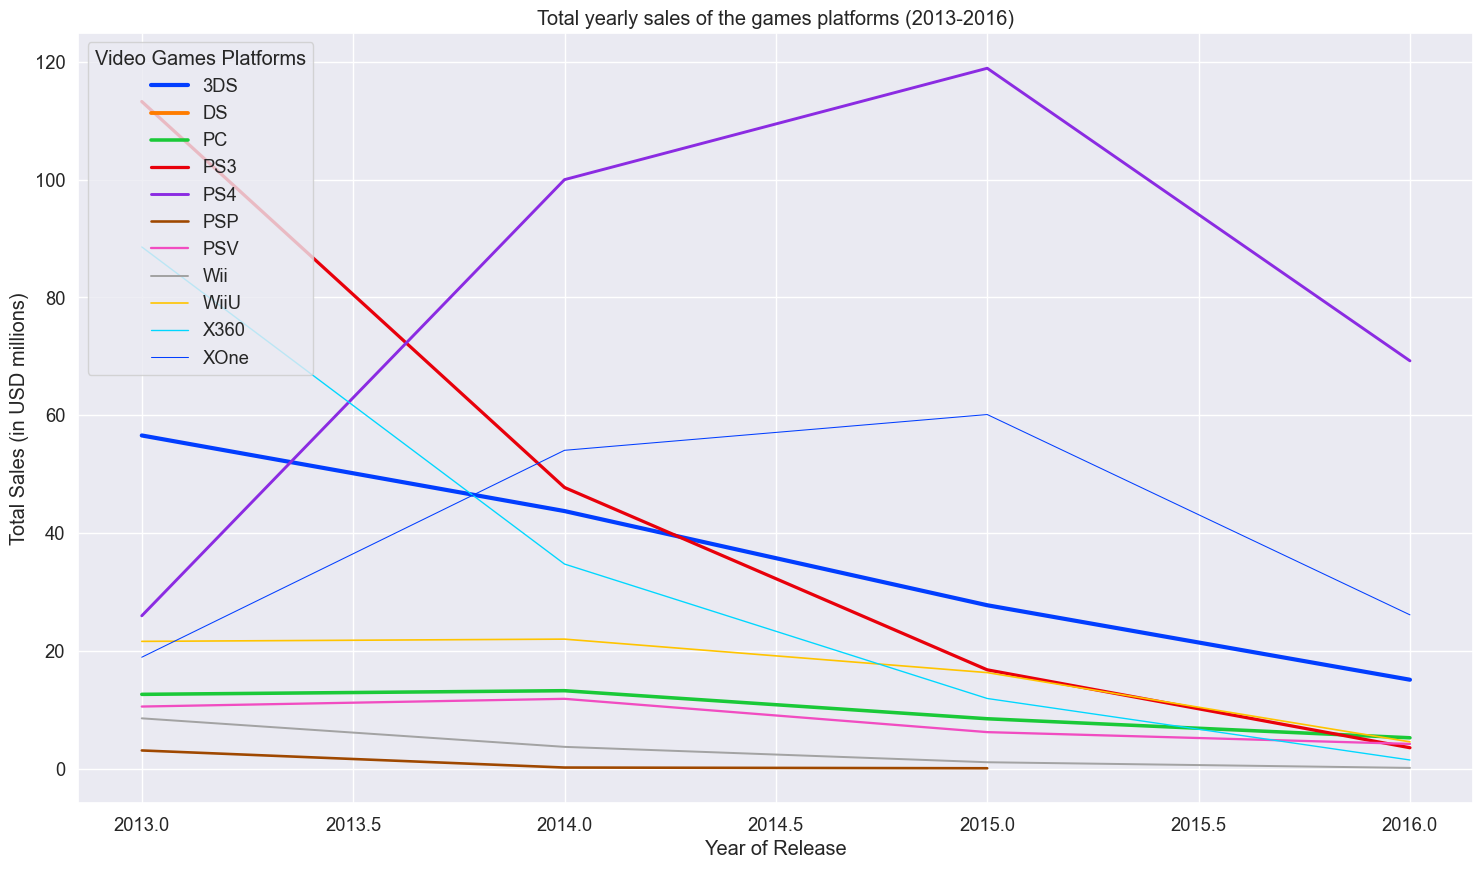

In [106]:
# Set line plot style properties
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a linechart for a DataFrame - df_grpd_platforms_and_release_year
ax = sns.lineplot(data=df_grpd_platforms_and_release_year, 
                  x='year_of_release',
                  y='total_sales',
                  hue='platform',
                  size='platform',
                  palette='bright')

ax.set(title='Total yearly sales of the games platforms (2013-2016)',
       xlabel='Year of Release', 
       ylabel='Total Sales (in USD millions)')

plt.legend(loc='upper left', title='Video Games Platforms')

plt.show()

We can also plot a grouped bar chart for more clearer perspective:

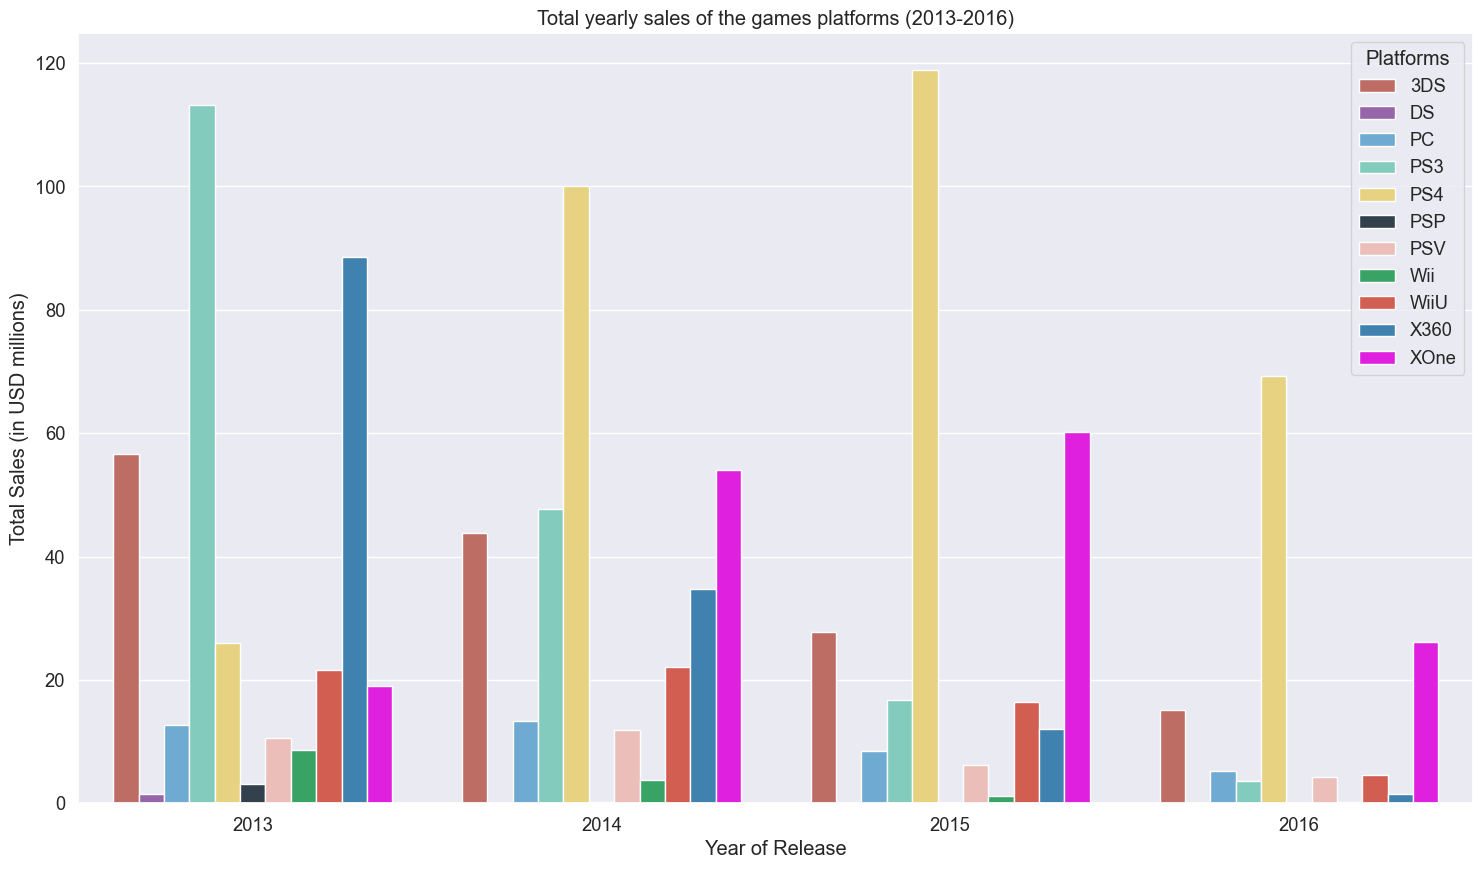

In [107]:
# Set bar plot style properties
colors = ['#CD6155', '#9B59B6', '#5DADE2', '#76D7C4', '#F7DC6F', '#2E4053', '#F5B7B1', '#28B463', '#E74C3C', '#2E86C1', '#FF00FF']
sns.set(rc = {'figure.figsize':(18.0, 10.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame - df_grpd_platforms_and_release_year
ax = sns.barplot(data=df_grpd_platforms_and_release_year, x='year_of_release', y='total_sales', hue='platform', palette=sns.color_palette(colors))
ax.set(title='Total yearly sales of the games platforms (2013-2016)',
       xlabel='Year of Release', 
       ylabel='Total Sales (in USD millions)')
plt.legend(loc='upper right', title='Platforms')

plt.show()

Based on the data for the years 2013 to 2016 and the line and bar plots above, we can draw the following conclusions about the **potentially profitable platforms, the leading platforms in sales, and the platforms that are growing or shrinking**:  

🔹 **Potentially Profitable Platforms (2013-2016)**:

- **PS4**: The PS4 platform has shown consistent sales growth over the years, with increasing sales from 2013 to 2015, followed by a slight decline in 2016.  
- **XOne**: The XOne platform has also exhibited consistent sales growth, with increasing sales from 2013 to 2015, followed by a slight decrease in 2016.  

🔹 **Leading Platforms in Sales**:

- **PS4**: The PS4 platform stands out as the leading platform in terms of sales during the specified period. It achieved high sales figures in 2014 and 2015, although there was a slight decline in 2016.  
- **XOne**: The XOne platform follows closely behind the PS4 in terms of sales, with significant growth from 2013 to 2015. It experienced a moderate decline in sales in 2016.  
- **PS3**: The PS3 platform, while experiencing a decline in sales, still maintained notable sales figures during the specified period.  

🔹 **Growing or Shrinking Platforms**:

- **Growing Platforms**: The platforms that exhibited sales growth from 2013 to 2015, followed by a slight decline in 2016, include PS4 and XOne. These platforms show potential for continued growth in the gaming market.  
- **Shrinking Platforms**: The platforms that experienced a significant decline in sales during the specified period include Wii, X360, PSP, and DS. These platforms are showing signs of shrinking and decreasing popularity.

So, from all the analysis above, if we have to select few specific platforms to focus our study on, we could choose the following:
- **PS4 and XOne**: As they were the two potentially profitable platforms and the two most leading platforms in sales for the year range - 2013 to 2016.
- **PS3**: As the PS3 platform, while experiencing a decline in sales, still maintained notable sales figures during the specified period.
- **PC**: Even though the sales were not significantly notable, but still maintained quite stable sales until 2016.

## 🔹 Global sales of all games broken down by platform <a id='global-sales'></a>  
[← Back to Contents](#contents)

Let's plot a box plot for the global sales (in USD million) of all games, broken down by platform to find out:
- Are the differences in sales significant?
- What about average sales on various platforms?

In [108]:
# Descriptive statistics of the global sales (in USD million) of all games, broken down by platform
global_sales = df_games.groupby('platform')['total_sales'].describe()
df_global_sales = pd.DataFrame(global_sales)
df_global_sales

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,304.0,0.471283,1.379310,0.01,0.0400,0.09,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.15,0.2525,0.51
PC,192.0,0.207031,0.349860,0.01,0.0300,0.08,0.2225,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.15,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.02,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.04,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.18,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.20,0.5950,7.09


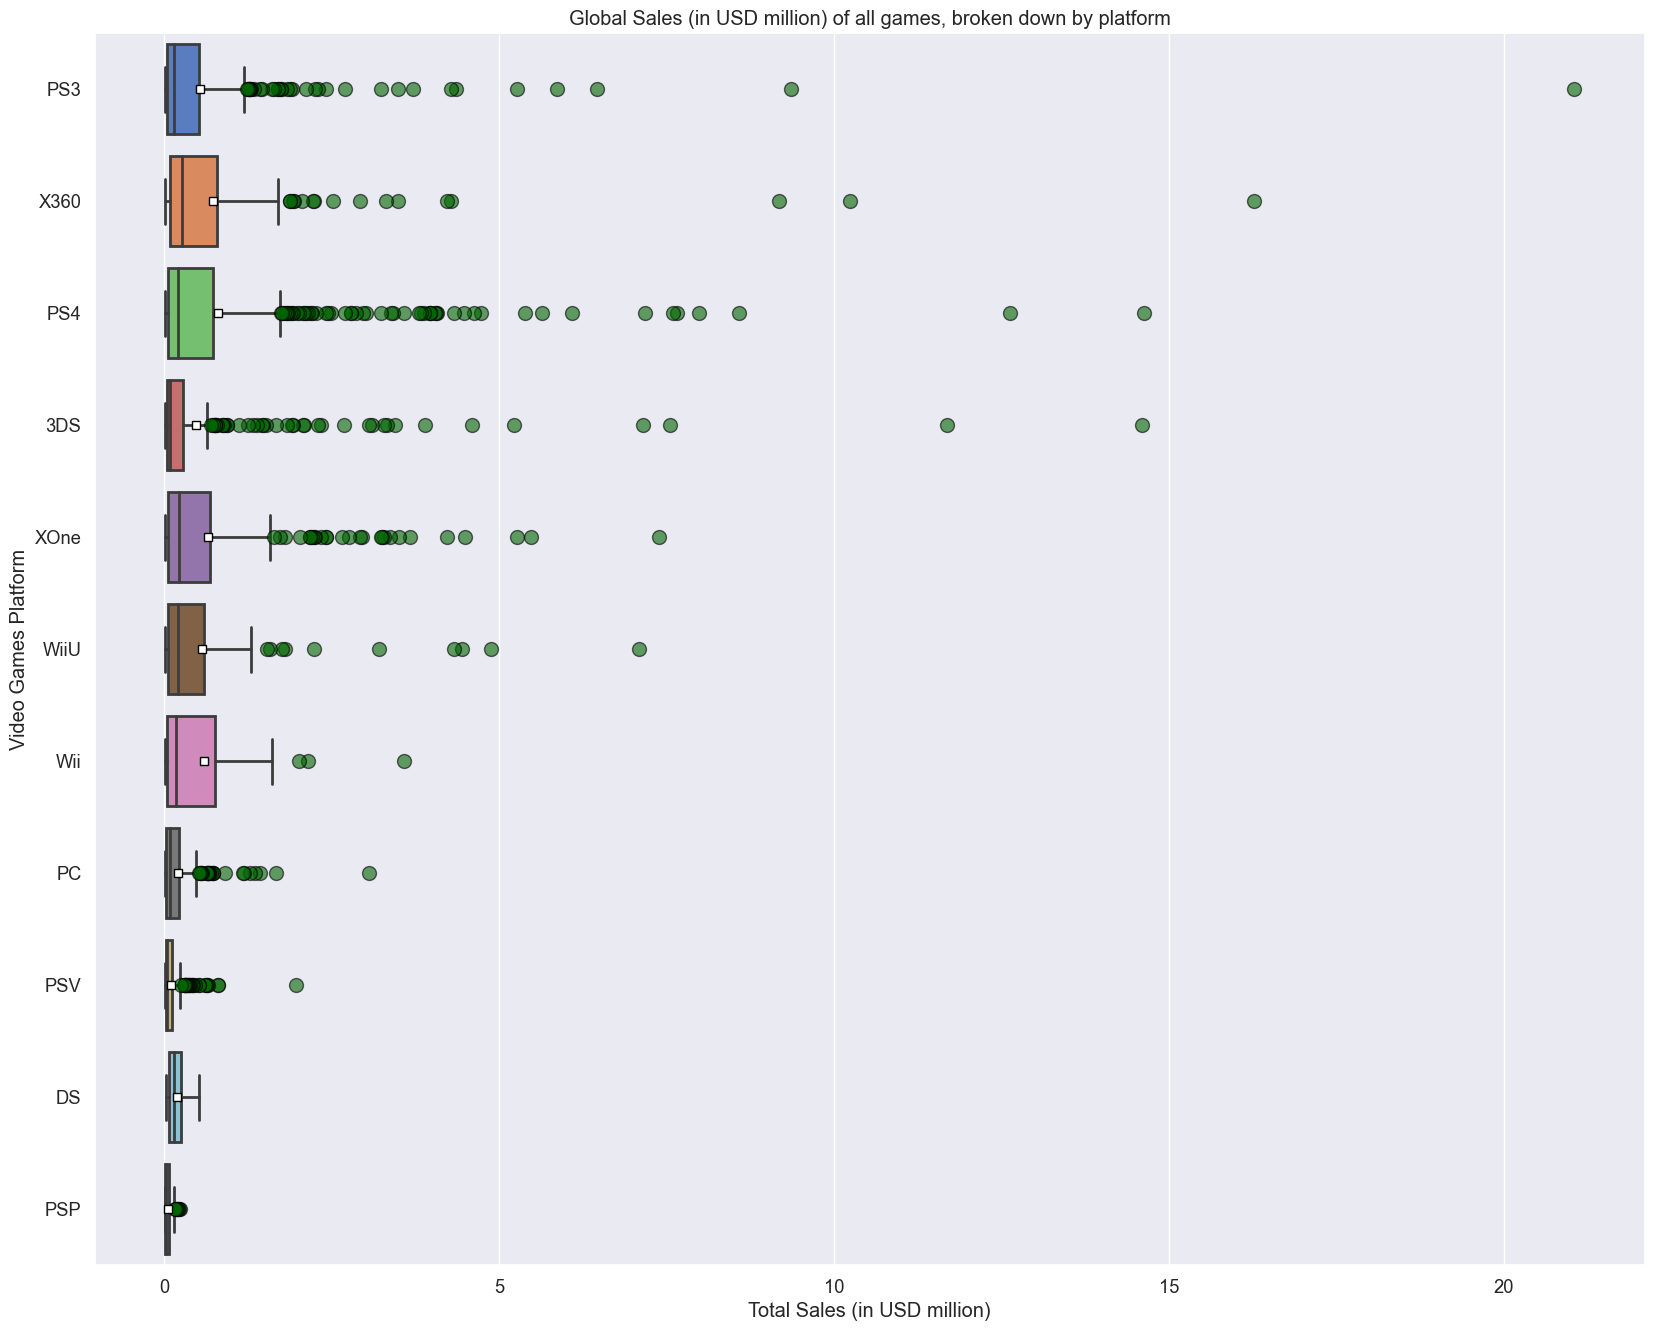

In [109]:
# Plot a boxplot to visualize the global sales (in USD million) of all games, broken down by platform

# Set box plot style properties
sns.set(rc = {'figure.figsize':(20.0, 16.0)})
sns.set(font_scale = 1.2)

# Customize the markers that show outliers in the data
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

# Customize the markers that show mean values
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

my_plot = sns.boxplot(
    data=df_games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='muted')

# Set the plot attributes
my_plot.set(xlabel='Total Sales (in USD million)',
            ylabel='Video Games Platform',
            title='Global Sales (in USD million) of all games, broken down by platform')

plt.show()

Wow! so much detail in a small area. In order to more clearly see, what's going on, let's zoom in:

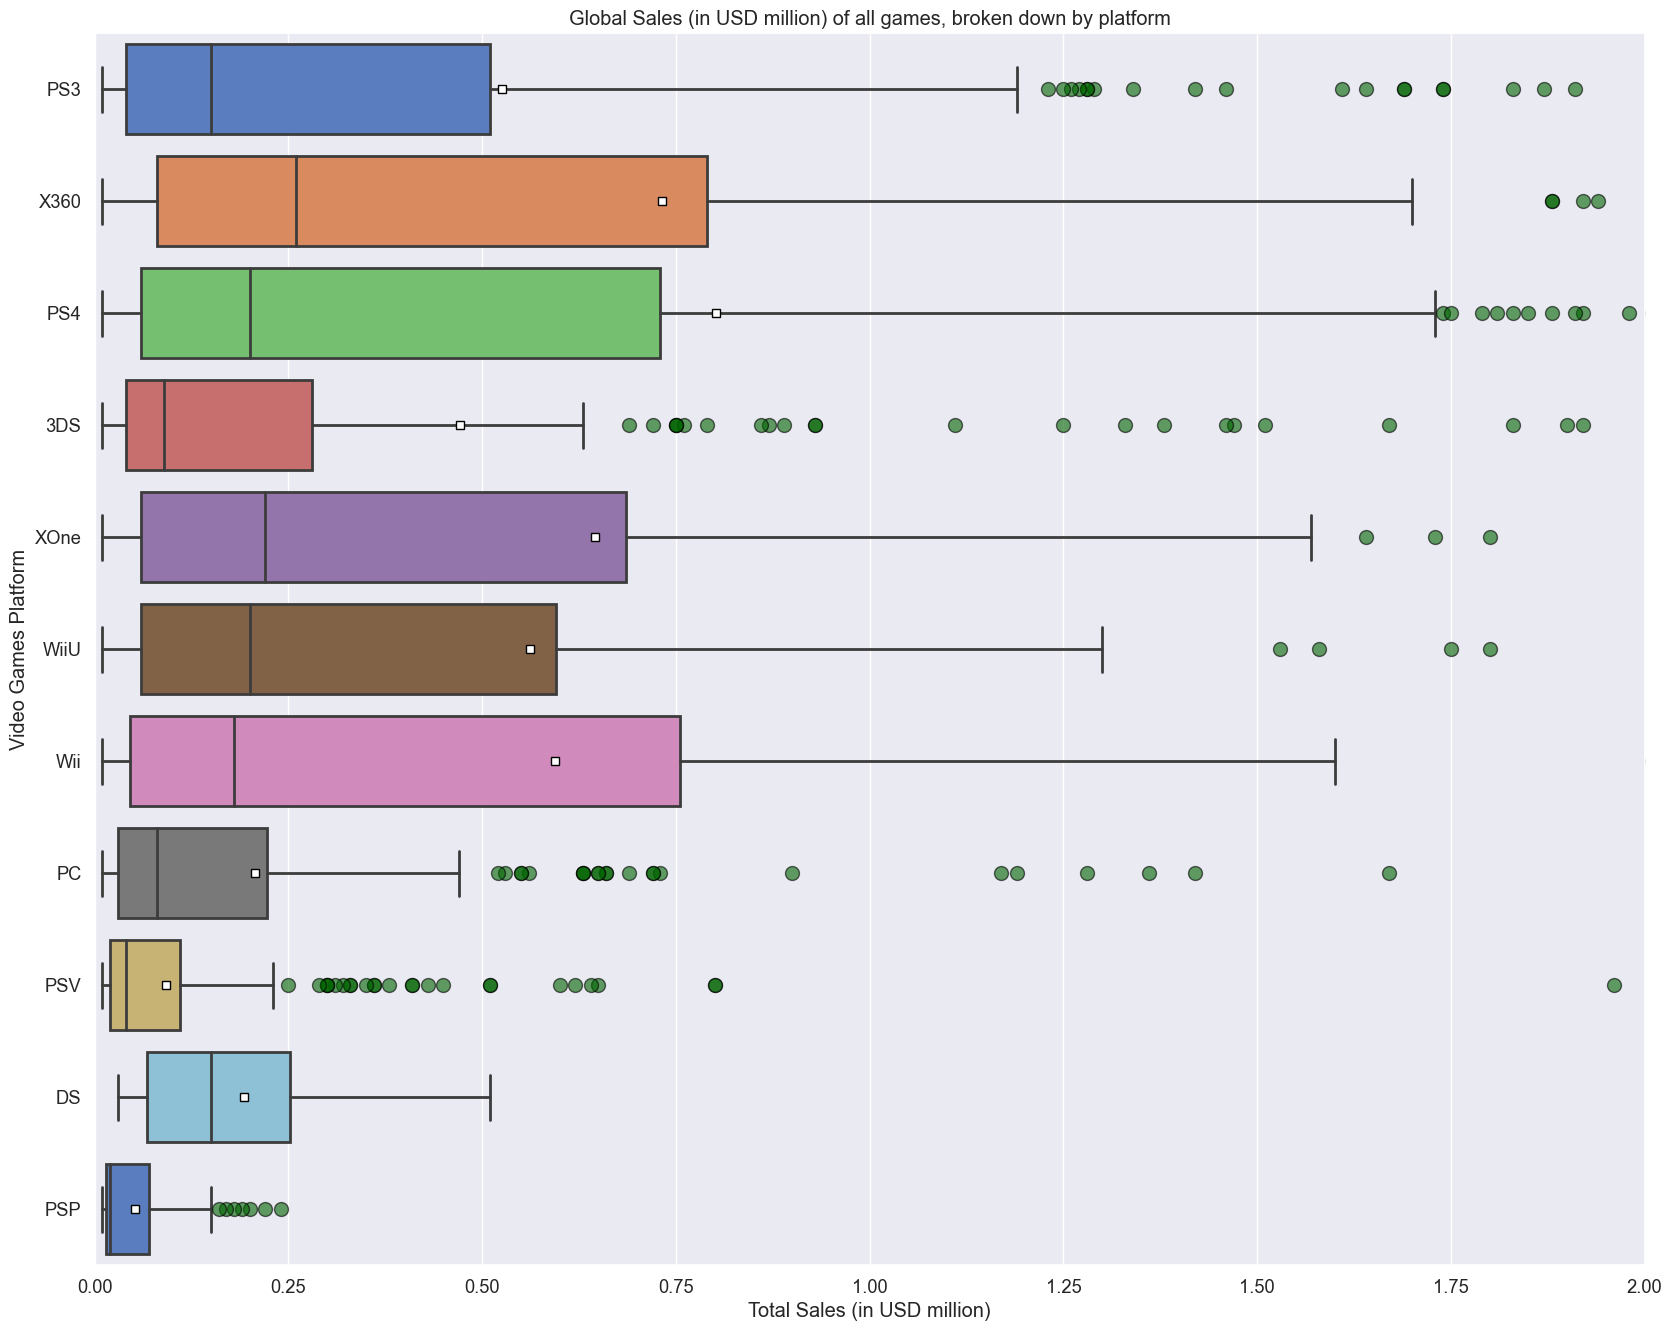

In [110]:
# Plot a boxplot to visualize the global sales (in USD million) of all games, broken down by platform

my_plot = sns.boxplot(
    data=df_games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='muted')

# Set the plot attributes
my_plot.set(xlabel='Total Sales (in USD million)',
            ylabel='Video Games Platform',
            title='Global Sales (in USD million) of all games, broken down by platform')

plt.xlim(0, 2)
plt.show()

We can also just visualize more closely about our chosen set of platform's before - `['PS4', 'PS3', 'XOne', 'PC']`:

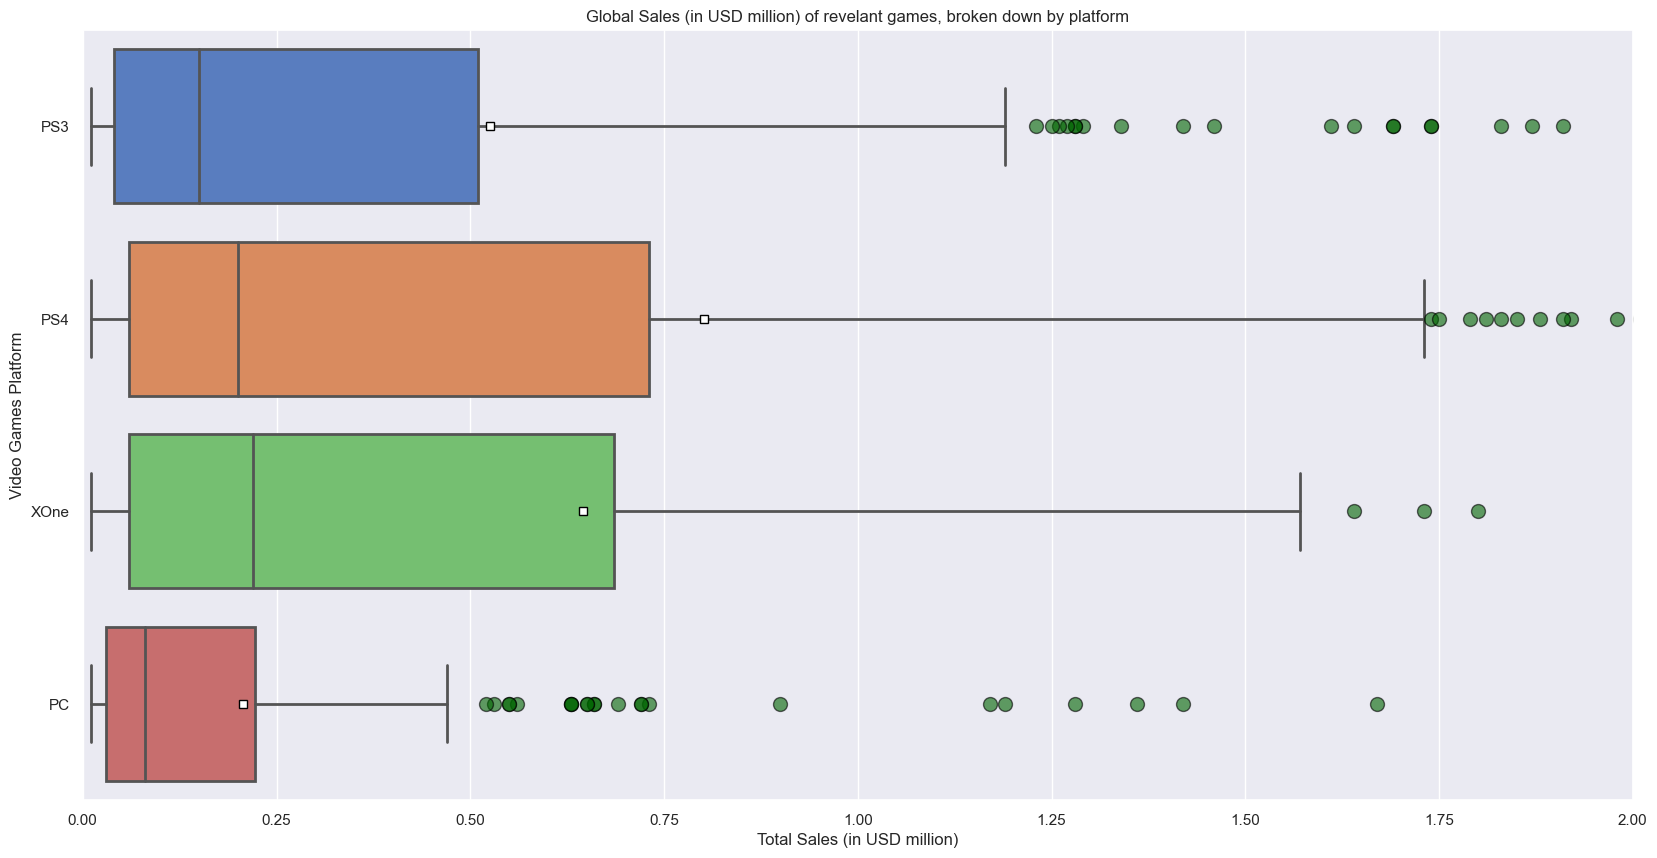

In [111]:
# Plot a boxplot to visualize the global sales (in USD million) of chosen games, broken down by platform
chosen_games = ['PS4', 'PS3', 'XOne', 'PC']
df_chosen_games = df_games.query('platform == @chosen_games')

# Set box plot style properties
sns.set(rc = {'figure.figsize':(20.0, 10.0)})

my_plot = sns.boxplot(
    data=df_chosen_games,
    y='platform',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='muted')

# Set the plot attributes
my_plot.set(xlabel='Total Sales (in USD million)',
            ylabel='Video Games Platform',
            title='Global Sales (in USD million) of revelant games, broken down by platform')
plt.xlim(0, 2)
plt.show()

**From the descriptive statistics data and box plots, we can draw the following conclusions**:

🔹 **Sales Variation**: **The sales data across platforms varies significantly**. The minimum and maximum sales values highlight the range within which sales vary for each platform. For example, the minimum sales for each platform range from 0.01 to 0.03 USD million, while the maximum sales range from 0.24 to 21.05 USD million for all the games. If we look only for our chosen relevant games then also, the minimum sales is 0.01 USD million, while the maximum sales range from 3.05 to 21.05 USD million.  

🔹 **Sales Distribution**: The sales data as shown in box plots exhibit different distributions for each platform. The mean and median values give an indication of the central tendency of sales for each platform. For instance, the mean total sales range from 0.052239 to 0.801378 USD million, and the median values range from 0.02 to 0.2 USD million.

🔹 **Sales Consistency**: The standard deviation values provide insights into the consistency or variability of sales within each platform. Platforms with higher standard deviation values indicate more variability in sales, while lower values suggest more consistent sales patterns.  

🔹 **Platforms with higher standard deviations, such as 3DS, PS3, PS4, Wii, WiiU, X360, and XOne, exhibit greater variability and less sales consistency. Conversely, platforms with lower standard deviations, such as DS, PSP, and PSV, show lower variability and higher sales consistency. PC falls in the moderate range of variability and consistency**.

🔹 **Platform Performance**: Comparing the mean sales across platforms, we can identify the leading platforms in terms of average sales during the given period. In this case, **PS4 has the highest average sales, followed by X360 and Wii**. If we look only for our chosen relevant games then, **PS4 has the highest average sales, followed by XOne, PS3 and then, PC**.  

In conclusion, there are significant differences in sales among the platforms because of the outliers (certain games on the platform), and PS4 has the highest average sales during the given period.

## 🔹 Effect of user and professional reviews on sales for popular platform <a id='effect-of_reviews'></a>  
[← Back to Contents](#contents)

Let's look at how user - `user_score` and professional reviews - `scaled_down_critic_score` affect sales for certain platforms. We'll calculate the correlation between both the reviews and sales and also, visualize the distrubution of both the cases using Scatterplots.  

It is intuitive for us to start looking for trends in the scatterplots. And, in fact, spotting trends is probably what we spend most of our time doing when we work with scatterplots. The plot alone isn’t super helpful, but if we can use the plot to observe some kind of a trend in the data, then we might be able to use that trend to draw conclusions or make predictions about the data.

The most common way that we’ll do this is with a **regression line**. It’s the line that best shows the trend in the data given in a scatterplot. A **regression line** is also called the **best-fit line**, **line of best fit**, or **least-squares line**. - [Scatterplots And Regression Lines](https://www.kristakingmath.com/blog/scatterplots-regression-lines#:~:text=It's%20the%20line%20that%20best,%2C%20or%20least%2Dsquares%20line.)

We are using `seaborn` data visualization library in this project. And in order to plot a scatterplot along with the regression line, we have to use `regplot()` method.  

Let's create a function that will create two scatterplots with regression line in each, for the given platform:
1. Plot between `total_sales` and `user_score`
2. Plot between `total_sales` and `scaled_down_critic_score`  
And also, calculates and prints the pearson's correlation coefficient for both the cases.

**Just to reiterate again, that we are focusing on the data from the period - 2013 to 2016 as stored in the Dataframe - `df_games`**.

In [112]:
def calc_n_plot_correlations(platform_name: str):
    
    """
    Create two scatterplots with regression line in each, for the given platform:
        1. Plot between total_sales and user_score
        2. Plot between total_sales and scaled_down_critic_score
    Calculates and prints the pearson's correlation coefficient for both the cases.
    
    Input: Name of the platform
    """
    # Filter the records from the dataframe - df_games for the given platfrom - platform_name
    df_games_for_single_platform = df_games.query('platform == @platform_name')
    
    # Create two sub plots
    figure, axes = plt.subplots(1, 2, figsize=(20,10))

    # Plot first scatterplot between user_score and total_sales
    ax1 = sns.regplot(data=df_games_for_single_platform,
            x='user_score',
            y='total_sales',
            ax=axes[0],
            scatter_kws = {'color': '#2E86C1', 'alpha': 0.7},
            line_kws = {'color': 'red'})
    
    ax1.set(xlabel='Scores given by users (0-10)',
            ylabel='Total sales (in USD million)',
            title=f'Correlation of User Scores for the platform {platform_name} with total sales',
            ylim=(-1/2,6))

    # Plot second scatterplot between scaled_down_critic_score and total_sales
    ax2 = sns.regplot(data=df_games_for_single_platform,
            x='scaled_down_critic_score',
            y='total_sales',
            ax=axes[1],
            scatter_kws = {'color': '#28B463', 'alpha': 0.7},
            line_kws = {'color': 'red'})
    
    ax2.set(xlabel='Scores given by critics (0-10)',
            ylabel='Total sales (in USD million)',
            title=f'Correlation of Critics Scores for the platform {platform_name} with total sales',
            ylim=(-1/2,6))
    
    plt.show()
    
    print(f"Pearson correlation coefficient between user scores and total sales for {platform_name}:", df_games_for_single_platform['total_sales'].corr(df_games_for_single_platform['user_score']))
    print(f"Pearson correlation coefficient between critic scores and total sales for {platform_name}:", df_games_for_single_platform['total_sales'].corr(df_games_for_single_platform['scaled_down_critic_score']))


Great! Now, let's find out which platform in the years 2013-2016 was having the maximum total sales. We'll apply the above method on the first three such platforms:

In [113]:
# Get data of total sales per platform during 2013-2016
games_by_platform = df_games.groupby('platform')['total_sales'].sum()
df_games_by_platform = pd.DataFrame(games_by_platform).reset_index()

# Sort the data by total sales in descending order
df_games_by_platform = df_games_by_platform.sort_values(by='total_sales', ascending=False)
df_games_by_platform

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.27
9,X360,136.83
8,WiiU,64.63
2,PC,39.75
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Awesome! Let's apply the function `calc_n_plot_correlations()` on **PS4** first:

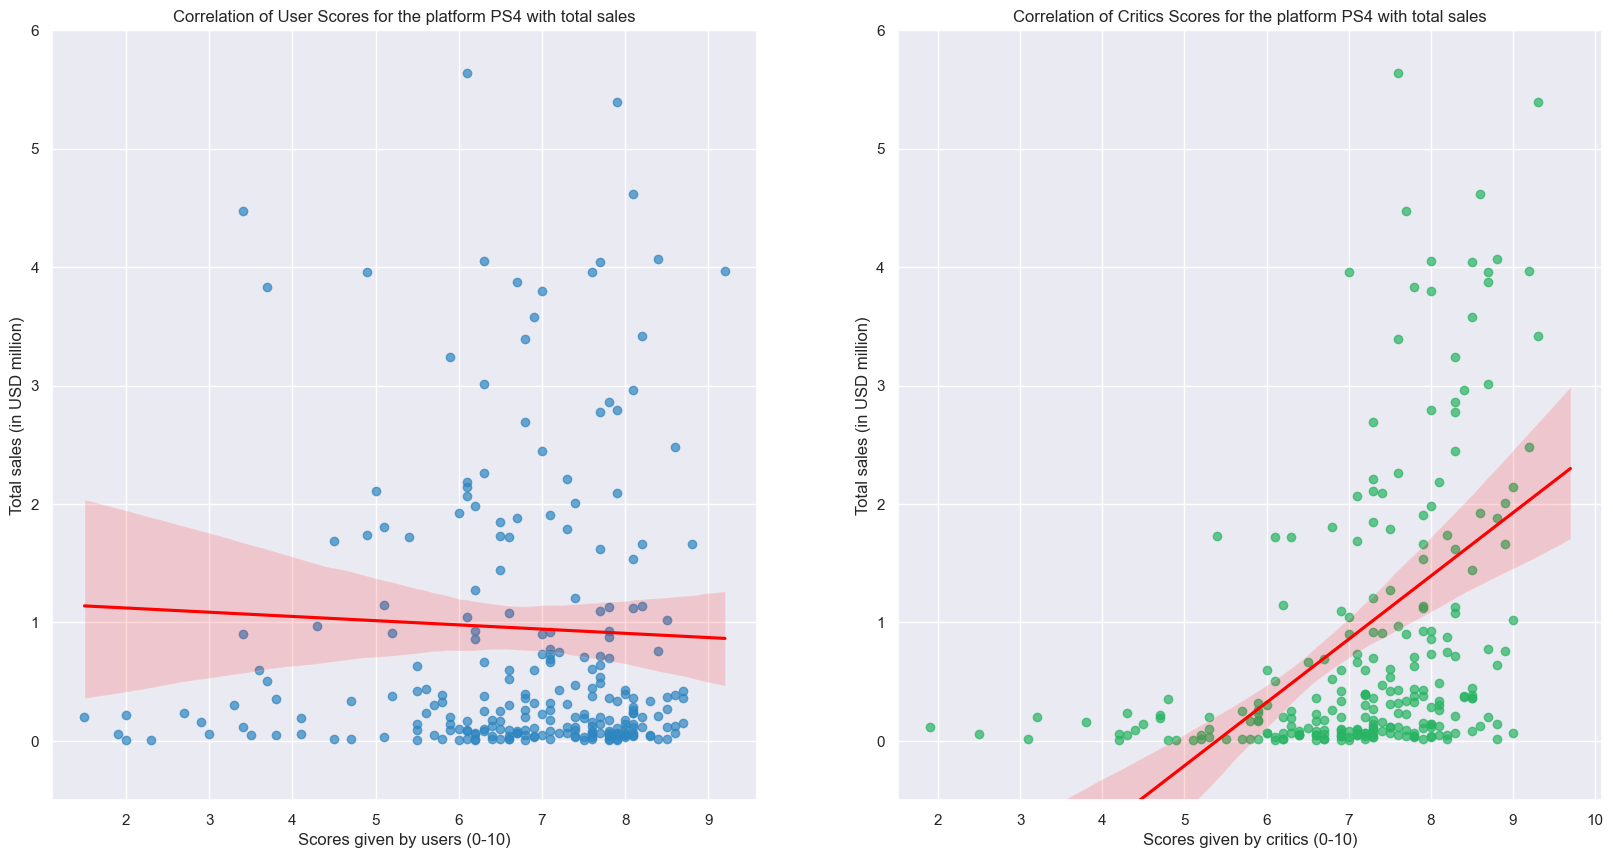

Pearson correlation coefficient between user scores and total sales for PS4: -0.031957110204556424
Pearson correlation coefficient between critic scores and total sales for PS4: 0.4065679020617812


In [114]:
calc_n_plot_correlations('PS4')

The Pearson correlation coefficient between user scores and total sales for the PS4 platform is approximately -0.032. This coefficient indicates a **very weak negative correlation between user scores and total sales**. In other words, there is a very slight negative relationship between user scores and the sales performance of PS4 games. However, the correlation is close to zero, suggesting that **user scores have little to no impact on the sales of PS4 games**.  

On the other hand, the Pearson correlation coefficient between critic scores and total sales for the PS4 platform is approximately 0.407. This coefficient indicates a **moderate positive correlation between critic scores and total sales**. It suggests that there is a moderate relationship between the reviews provided by critics and the sales performance of PS4 games. **Positive reviews from critics tend to have a moderate influence on the sales of PS4 games.**  

In summary, **user scores have a negligible impact on the sales of PS4 games, while critic scores have a moderate positive influence on the sales performance of PS4 games**. Critics' reviews are more likely to affect the sales of PS4 games compared to user scores.

Awesome! Let's apply the function `calc_n_plot_correlations()` on **PS3** next:

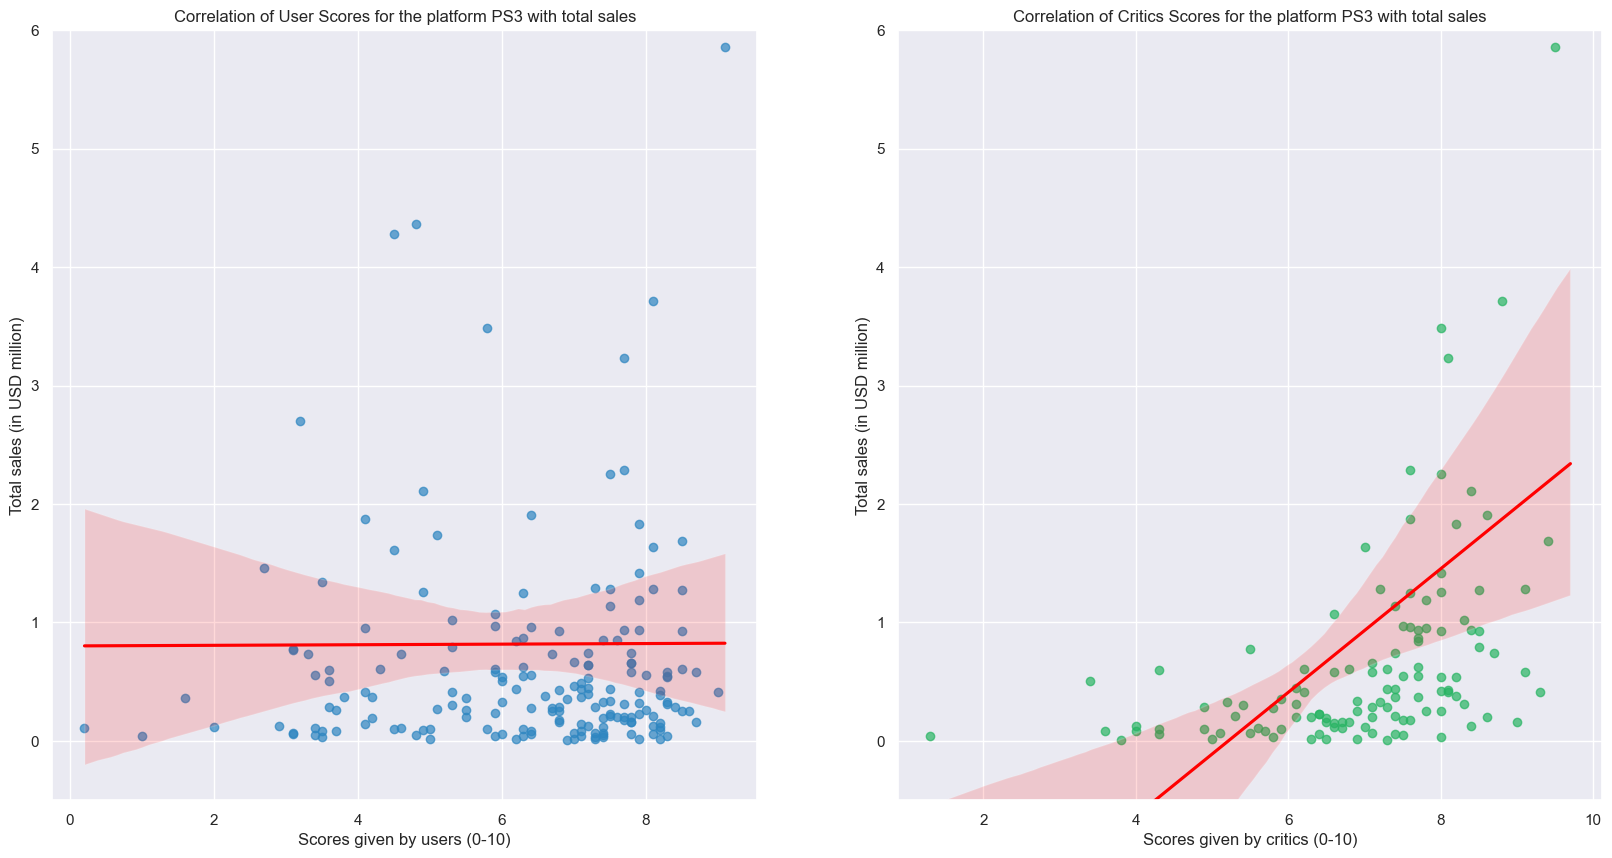

Pearson correlation coefficient between user scores and total sales for PS3: 0.0023944027357566925
Pearson correlation coefficient between critic scores and total sales for PS3: 0.3342853393371917


In [115]:
calc_n_plot_correlations('PS3')

The Pearson correlation coefficient between user scores and total sales for the PS3 platform is approximately 0.0024. This coefficient indicates a **very weak positive correlation between user scores and total sales**. In other words, there is almost no relationship between user scores and the sales performance of PS3 games. **User scores do not have a significant impact on the sales of PS3 games**.  

On the other hand, the Pearson correlation coefficient between critic scores and total sales for the PS3 platform is approximately 0.3343. This coefficient suggests a **moderate positive correlation between critic scores and total sales**. It indicates that there is a moderate relationship between the reviews provided by critics and the sales performance of PS3 games. **Positive reviews from critics tend to have a moderate influence on the sales of PS3 games**.  

In summary, while there is little to no relationship between user scores and total sales for the PS3 platform, there is a moderate positive correlation between critic scores and total sales. **Critics' reviews have a more significant impact on the sales of PS3 games compared to user scores**.

Awesome! Let's apply the function `calc_n_plot_correlations()` on **XOne** next:

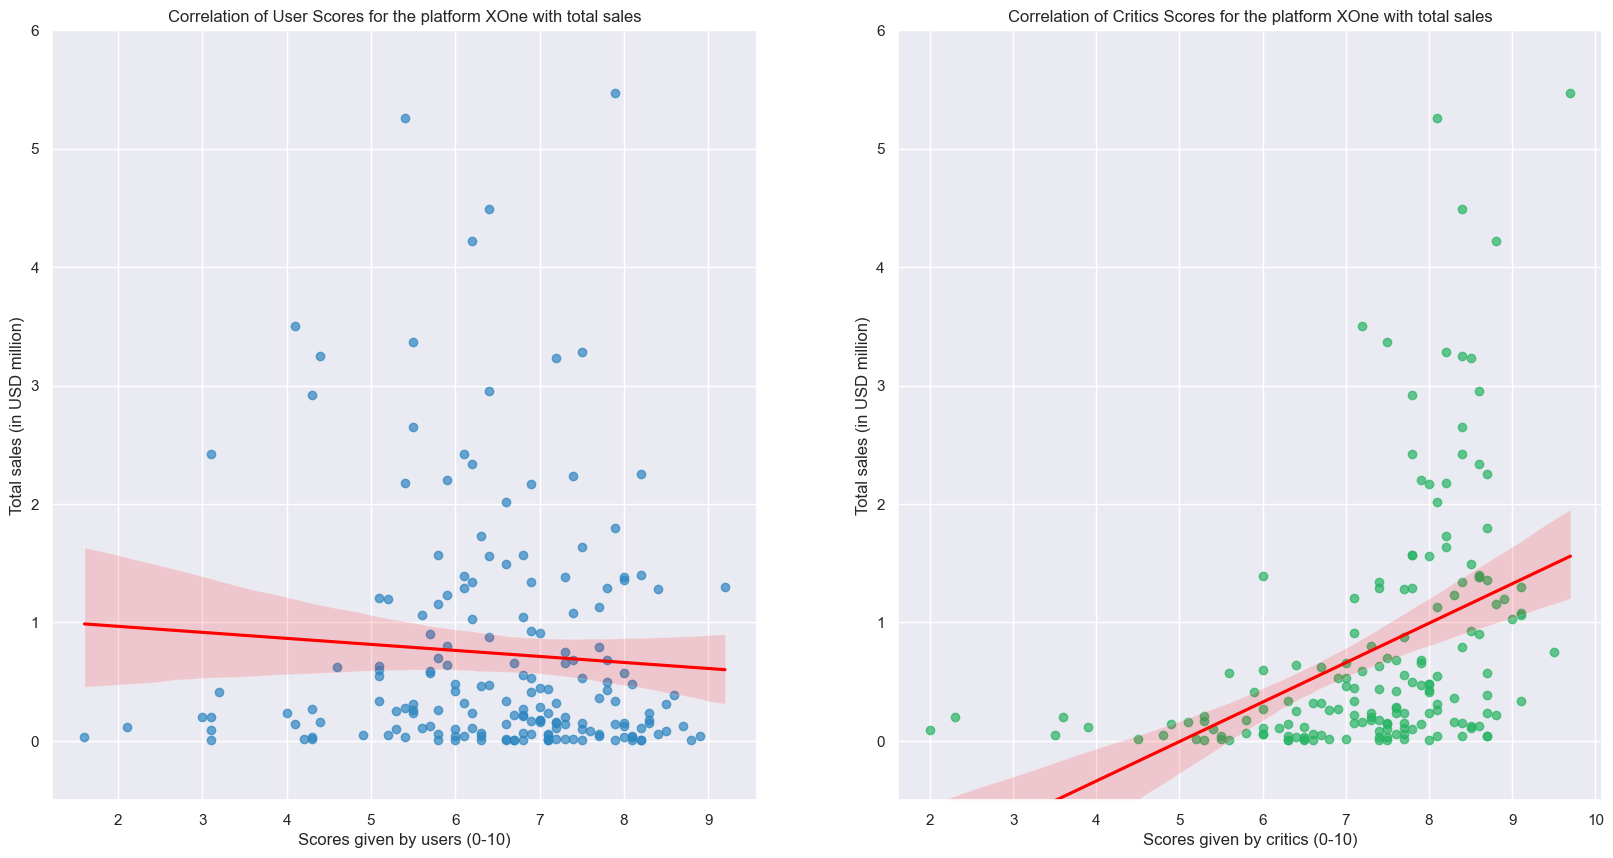

Pearson correlation coefficient between user scores and total sales for XOne: -0.06892505328279412
Pearson correlation coefficient between critic scores and total sales for XOne: 0.4169983280084022


In [116]:
calc_n_plot_correlations('XOne')

The Pearson correlation coefficient between user scores and total sales for the XOne platform is approximately -0.069. This coefficient indicates a **very weak negative correlation between user scores and total sales**. It suggests that there is a very slight negative relationship between user scores and the sales performance of XOne games. However, the correlation is close to zero, indicating that **user scores have little to no impact on the sales of XOne games**.  

On the other hand, the Pearson correlation coefficient between critic scores and total sales for the XOne platform is approximately 0.417. This coefficient indicates a **moderate positive correlation between critic scores and total sales**. It suggests that there is a moderate relationship between the reviews provided by critics and the sales performance of XOne games. **Positive reviews from critics tend to have a moderate influence on the sales of XOne games**.  

In summary, **user scores have a negligible impact on the sales of XOne games, while critic scores have a moderate positive influence on the sales performance of XOne games**. Critics' reviews are more likely to affect the sales of XOne games compared to user scores.

Let's calculate the **Pearson correlation coefficient between user reviews and total sales for all the platforms**:

In [117]:
# Get Pearson correlation coefficient for all the platforms - user scores vs total sales
df_games_grp_by_platforms_1 = df_games.groupby('platform')[['user_score', 'total_sales']].corr().reset_index()
df_games_grp_by_platforms_1 = df_games_grp_by_platforms_1.iloc[:-1:2, [0,3]]
df_games_grp_by_platforms_1 = df_games_grp_by_platforms_1.rename(columns={'total_sales': 'corr_user_scores_vs_total_sales'})
df_games_grp_by_platforms_1

,platform,corr_user_scores_vs_total_sales
0,3DS,0.241504
2,DS,NaN
4,PC,-0.088082
6,PS3,0.002394
8,PS4,-0.031957
10,PSP,-1.000000
12,PSV,0.000942
14,Wii,0.682942
16,WiiU,0.419330
18,X360,-0.010167


**The Pearson correlation coefficient measures the linear relationship between two variables.** In this case, it measures the correlation between user scores and total sales for each platform. Here are the conclusions we can draw from the above data for all the platforms:

- **3DS**: The correlation coefficient of `0.241504` suggests a weak positive correlation between user scores and total sales for the 3DS platform. However, the correlation is not very strong.

- **DS**: The correlation coefficient is marked as `NaN`, indicating that there is missing data to calculate the correlation between user scores and total sales for the DS platform.

- **PC**: The correlation coefficient of `-0.088082` indicates a weak negative correlation between user scores and total sales for the PC platform. However, the correlation is not significant.

- **PS3**: The correlation coefficient of `0.002394` suggests an almost negligible correlation between user scores and total sales for the PS3 platform.

- **PS4**: The correlation coefficient of `-0.031957` indicates a very weak negative correlation between user scores and total sales for the PS4 platform. However, the correlation is not significant.

- **PSP**: The correlation coefficient of `-1.000000` suggests a perfect negative correlation between user scores and total sales for the PSP platform.

- **PSV**: The correlation coefficient of `0.000942` suggests no significant correlation between user scores and total sales for the PSV platform. The correlation is very weak, almost non-existent.

- **Wii**: The correlation coefficient of `0.682942` indicates a moderate positive correlation between user scores and total sales for the Wii platform.

- **WiiU**: The correlation coefficient of `0.419330` suggests a moderate positive correlation between user scores and total sales for the WiiU platform. Higher user scores are associated with higher total sales, but the relationship is not as strong as for the Wii platform.

- **X360**: The correlation coefficient of `-0.010167` indicates a very weak negative correlation between user scores and total sales for the X360 platform. The correlation is practically negligible.

- **XOne**: The correlation coefficient of `-0.068925` suggests a very weak negative correlation between user scores and total sales for the XOne platform. However, the correlation is not significant.

Let's calculate the **Pearson correlation coefficient between critics reviews and total sales for all the platforms**:

In [118]:
# Get Pearson correlation coefficient for all the platforms - crtic scores vs total sales
df_games_grp_by_platforms_2 = df_games.groupby('platform')[['scaled_down_critic_score', 'total_sales']].corr().reset_index()
df_games_grp_by_platforms_2 = df_games_grp_by_platforms_2.iloc[:-1:2, [0,3]]
df_games_grp_by_platforms_2 = df_games_grp_by_platforms_2.rename(columns={'total_sales': 'corr_critic_scores_vs_total_sales'})
df_games_grp_by_platforms_2

,platform,corr_critic_scores_vs_total_sales
0,3DS,0.357057
2,DS,NaN
4,PC,0.201983
6,PS3,0.334285
8,PS4,0.406568
10,PSP,NaN
12,PSV,0.254742
14,Wii,NaN
16,WiiU,0.376415
18,X360,0.350345


Based on the above calculated **Pearson correlation coefficients between critic scores and total sales for each platform, we can draw the following conclusions**:

- **3DS**: The correlation coefficient of `0.357057` indicates a moderate positive correlation between critic scores and total sales for the 3DS platform. **Higher critic scores are associated with higher total sales, suggesting that positive reviews from critics can influence sales to some extent**.

- **DS**: The correlation coefficient is marked as `NaN`, indicating that there is missing data to calculate the correlation between critic scores and total sales for the DS platform.

- **PC**: The correlation coefficient of `0.201983` suggests a weak positive correlation between critic scores and total sales for the PC platform. While there is a positive relationship, it is not particularly strong.

- **PS3**: The correlation coefficient of `0.334285` suggests a moderate positive correlation between critic scores and total sales for the PS3 platform. **Higher critic scores tend to correspond with higher total sales**.

- **PS4**: The correlation coefficient of `0.406568` indicates a moderate positive correlation between critic scores and total sales for the PS4 platform. **Positive reviews from critics are moderately associated with higher total sales**.

- **PSP**: The correlation coefficient is marked as `NaN`, indicating that there is missing data to calculate the correlation between critic scores and total sales for the PSP platform.

- **PSV**: The correlation coefficient of `0.254742` suggests a weak positive correlation between critic scores and total sales for the PSV platform. While there is a positive relationship, it is not particularly strong.

- **Wii**: The correlation coefficient is marked as `NaN`, indicating that there is missing data to calculate the correlation between critic scores and total sales for the Wii platform.

- **WiiU**: The correlation coefficient of `0.376415` indicates a moderate positive correlation between critic scores and total sales for the WiiU platform. **Higher critic scores are associated with higher total sales**.

- **X360**: The correlation coefficient of `0.350345` suggests a moderate positive correlation between critic scores and total sales for the X360 platform. **Positive reviews from critics are moderately associated with higher total sales**.

- **XOne**: The correlation coefficient of 0.416998 indicates a moderate positive correlation between critic scores and total sales for the XOne platform. **Positive reviews from critics are moderately associated with higher total sales**.   

In summary, **platforms such as PS4, XOne, and WiiU show a moderate positive correlation between critic scores and total sales, indicating that positive reviews from critics tend to influence sales to a certain degree. Other platforms either exhibit weak or negligible correlations or have missing data (DS, PSP, Wii)**.

## 🔹 Compare the sales of the same games on other platforms <a id='same-games-different-platforms'></a>  
[← Back to Contents](#contents)

Since, in the range of years - 2013-2016, the platform with highest total sales is **PS4**, let's get the top 5 games with highest total sales:

In [119]:
# Get the top 5 games with highest total sales on PS4 platform
top_five_best_sellers_on_PS4 = df_games.query('platform == "PS4"').groupby('name')['total_sales'].sum()
top_five_best_sellers_on_PS4 = top_five_best_sellers_on_PS4.sort_values(ascending=False).head(5)
df_top_five_best_sellers_on_PS4 = pd.DataFrame(top_five_best_sellers_on_PS4).reset_index()
df_top_five_best_sellers_on_PS4

,name,total_sales
0,Call of Duty: Black Ops 3,14.63
1,Grand Theft Auto V,12.62
2,FIFA 16,8.58
3,Star Wars Battlefront (2015),7.98
4,Call of Duty: Advanced Warfare,7.66


In [120]:
df_top_five_best_sellers_on_PS4 = df_top_five_best_sellers_on_PS4['name'].tolist()
df_top_five_best_sellers_on_PS4

['Call of Duty: Black Ops 3',
 'Grand Theft Auto V',
 'FIFA 16',
 'Star Wars Battlefront (2015)',
 'Call of Duty: Advanced Warfare']

Awesome! Now, we'll plot bar plots for these five games on different platforms and compare their total sales. Let's first of all write a function to create a bar plot:

In [121]:
def plot_barplot(game_name: str):
    # Filter the data only for the given game
    df_particular_games = df_games.query('name == @game_name')
    
    # Set bar plot style properties
    sns.set(rc = {'figure.figsize':(8.0, 8.0)})
    sns.set(font_scale = 1.2)

    # Plot a barchart for a DataFrame - df_particular_games
    ax = sns.barplot(data=df_particular_games, x='platform', y='total_sales', palette='muted')
    ax.set(title=f'Distribution of Total Sales of {game_name} on different platforms',
           xlabel='Video Games Platforms', 
           ylabel='Total Sales (in USD millions)')

    # Show values on bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

    plt.show()

Great! So, let's call this function - `plot_barplot()` on the list - `df_top_five_best_sellers_on_PS4` to plot the barcharts:

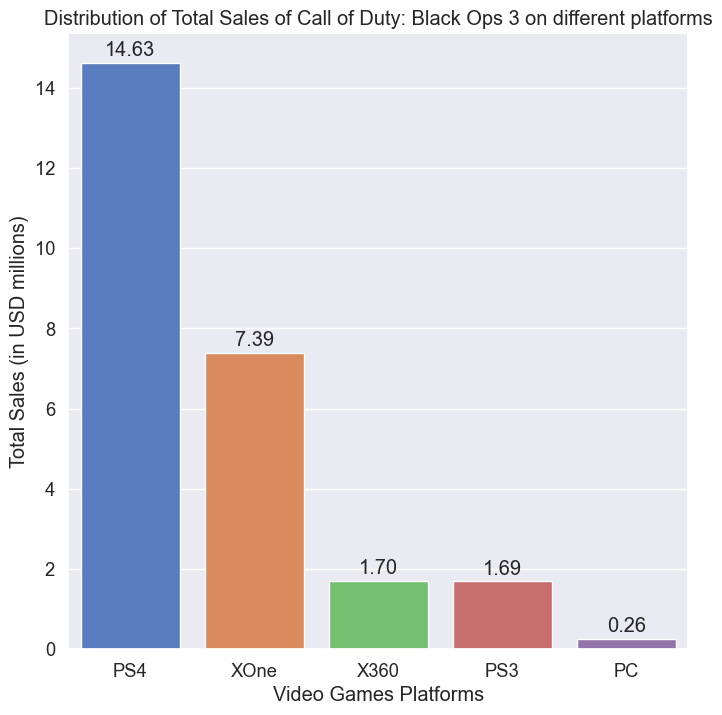

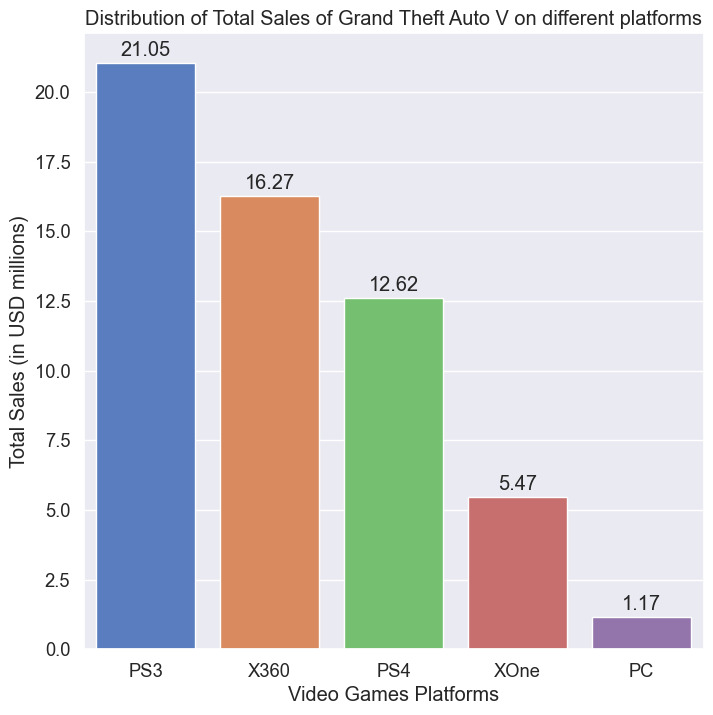

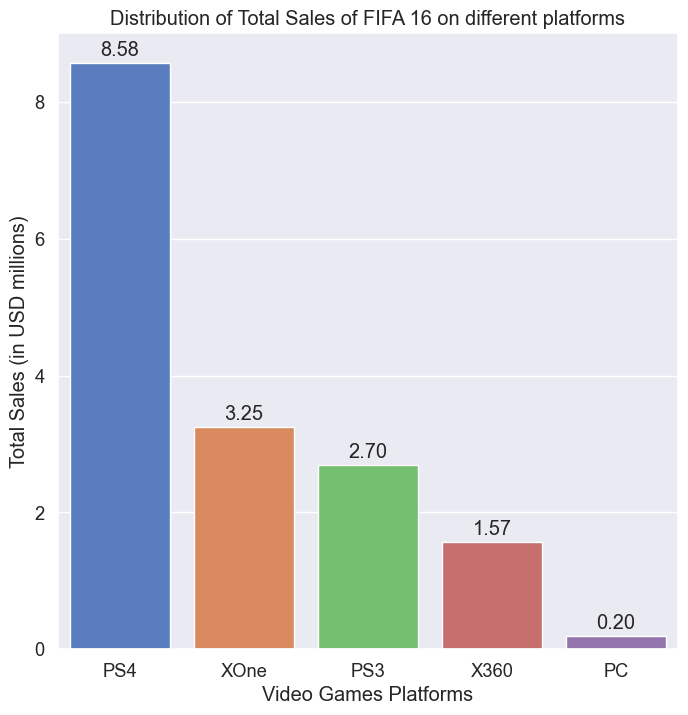

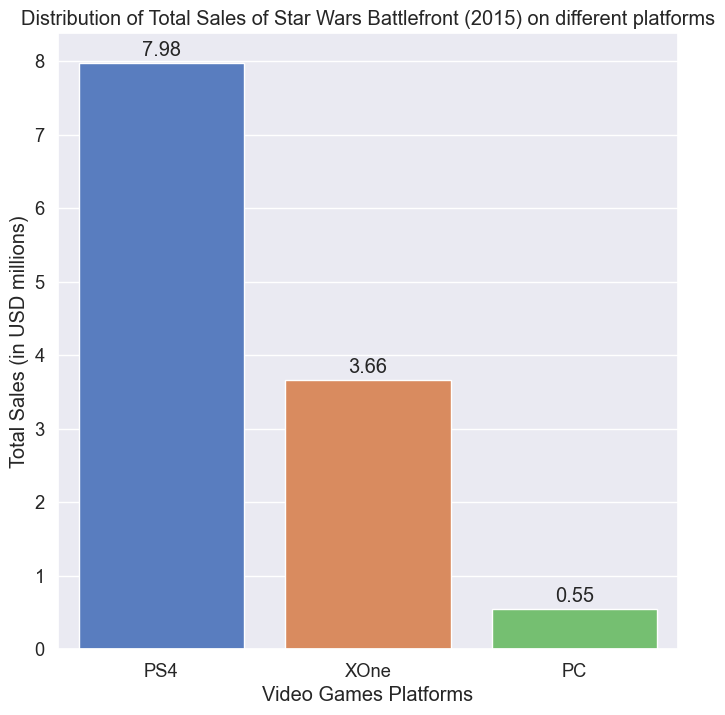

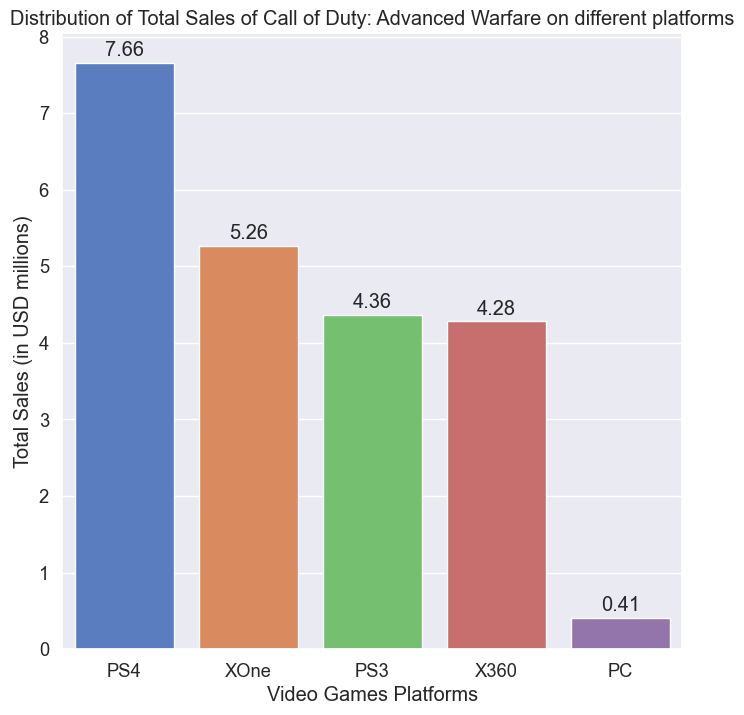

In [122]:
for game in df_top_five_best_sellers_on_PS4:
    plot_barplot(game)

All these games which were the best sellers on **PS4** category have done great in terms of global or total sales on **XOne** platform and the worst on **PC**.

## 🔹 General distribution of games by genre <a id='games-by-genre'></a>  
[← Back to Contents](#contents)

Let's analyze the average sales per genre. It will give us insight into which ones are the most profitable genres in the video games industry:

In [123]:
# Calculate average sales
df_games['average_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,scaled_down_critic_score,user_score,esrb_rating,average_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,9.7,8.2,M,5.2625
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,9.7,8.1,M,4.0675
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,RP,3.6575
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,RP,3.6500
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,9.7,8.3,M,3.1550


In [124]:
# Get average sales per genre
games_by_genres = df_games.groupby('genre')['average_sales'].sum().sort_values(ascending=False)
df_games_by_genres = pd.DataFrame(games_by_genres).reset_index()
df_games_by_genres

,genre,average_sales
0,Action,80.5375
1,Shooter,58.2525
2,Sports,37.6675
3,Role-Playing,36.4725
4,Misc,15.7050
5,Platform,10.6575
6,Racing,9.9725
7,Fighting,8.8275
8,Adventure,5.9100
9,Simulation,5.4400


Let's plot a bar plot to visualize the above data and show clearly - the most profitable genres in the video games industry:

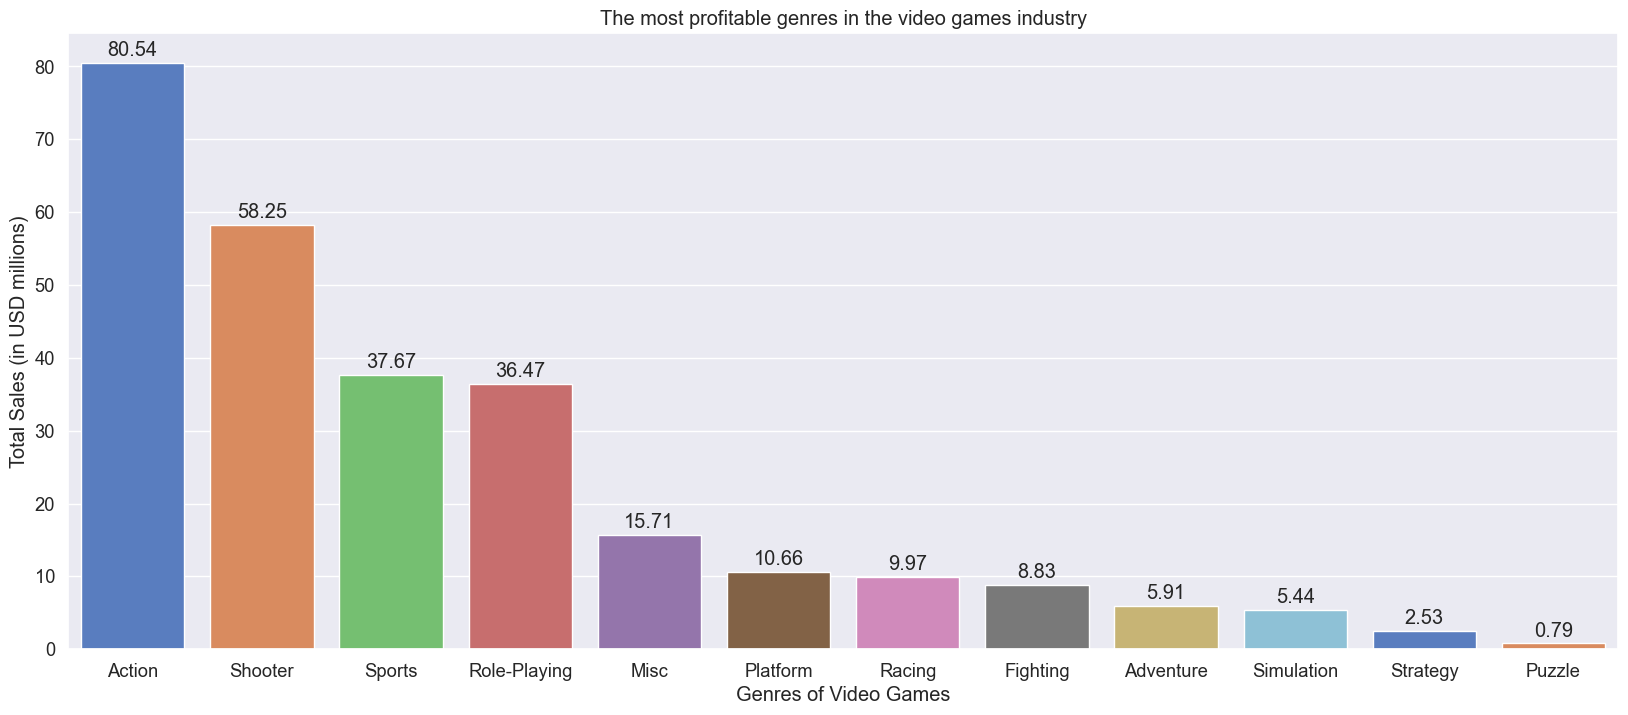

In [125]:
# Set bar plot style properties
sns.set(rc = {'figure.figsize':(20.0, 8.0)})
sns.set(font_scale = 1.2)

# Plot a barchart for a DataFrame - df_games_by_genres
ax = sns.barplot(data=df_games_by_genres, x='genre', y='average_sales', palette='muted')
ax.set(title='The most profitable genres in the video games industry',
       xlabel='Genres of Video Games', 
       ylabel='Total Sales (in USD millions)')

# Show values on bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

Based on the data and barplot above from 2013 to 2016, we can observe the following:

- **Most Profitable Genres**: The genres with the highest average sales are **Action and Shooter**. Action games have an average sales value of 80.5375 USD million, while Shooter games have an average sales value of 58.2525 USD million. These genres tend to generate higher revenues compared to other genres.

- **Genres with High Sales**: In addition to Action and Shooter, the genres with relatively high average sales are **Sports and Role-Playing**. Sports games have an average sales value of 37.6675 USD million, while Role-Playing games have an average sales value of 36.4725 USD million. These genres also have a significant market share and generate considerable sales.

- **Genres with Low Sales**: The genres with the lowest average sales values are **Puzzle, Strategy, and Simulation**. Puzzle games have the lowest average sales value at 0.7925 USD million, followed by Strategy games at 2.53 USD million and Simulation games at 5.44 USD million. 

In general, genres such as **Action, Shooter, Sports, and Role-Playing tend to have high average sales** and generate significant revenue. On the other hand, **genres like Puzzle and Strategy may have lower average sales and appeal to a more niche audience**. 

Let's also get the descriptive statistics on the total sales per genre:

In [126]:
# Get the descriptive statistics on the total sales per genre
df_desc_stats_games_by_genres = df_games.groupby('genre')['total_sales'].describe()
df_desc_stats_games_by_genres

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,768.0,0.419466,1.252359,0.01,0.0300,0.110,0.3325,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.0200,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.0600,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.0300,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.0900,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.0200,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.0500,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.0600,0.125,0.3825,14.60
Shooter,188.0,1.239415,2.010671,0.01,0.1375,0.445,1.3925,14.63


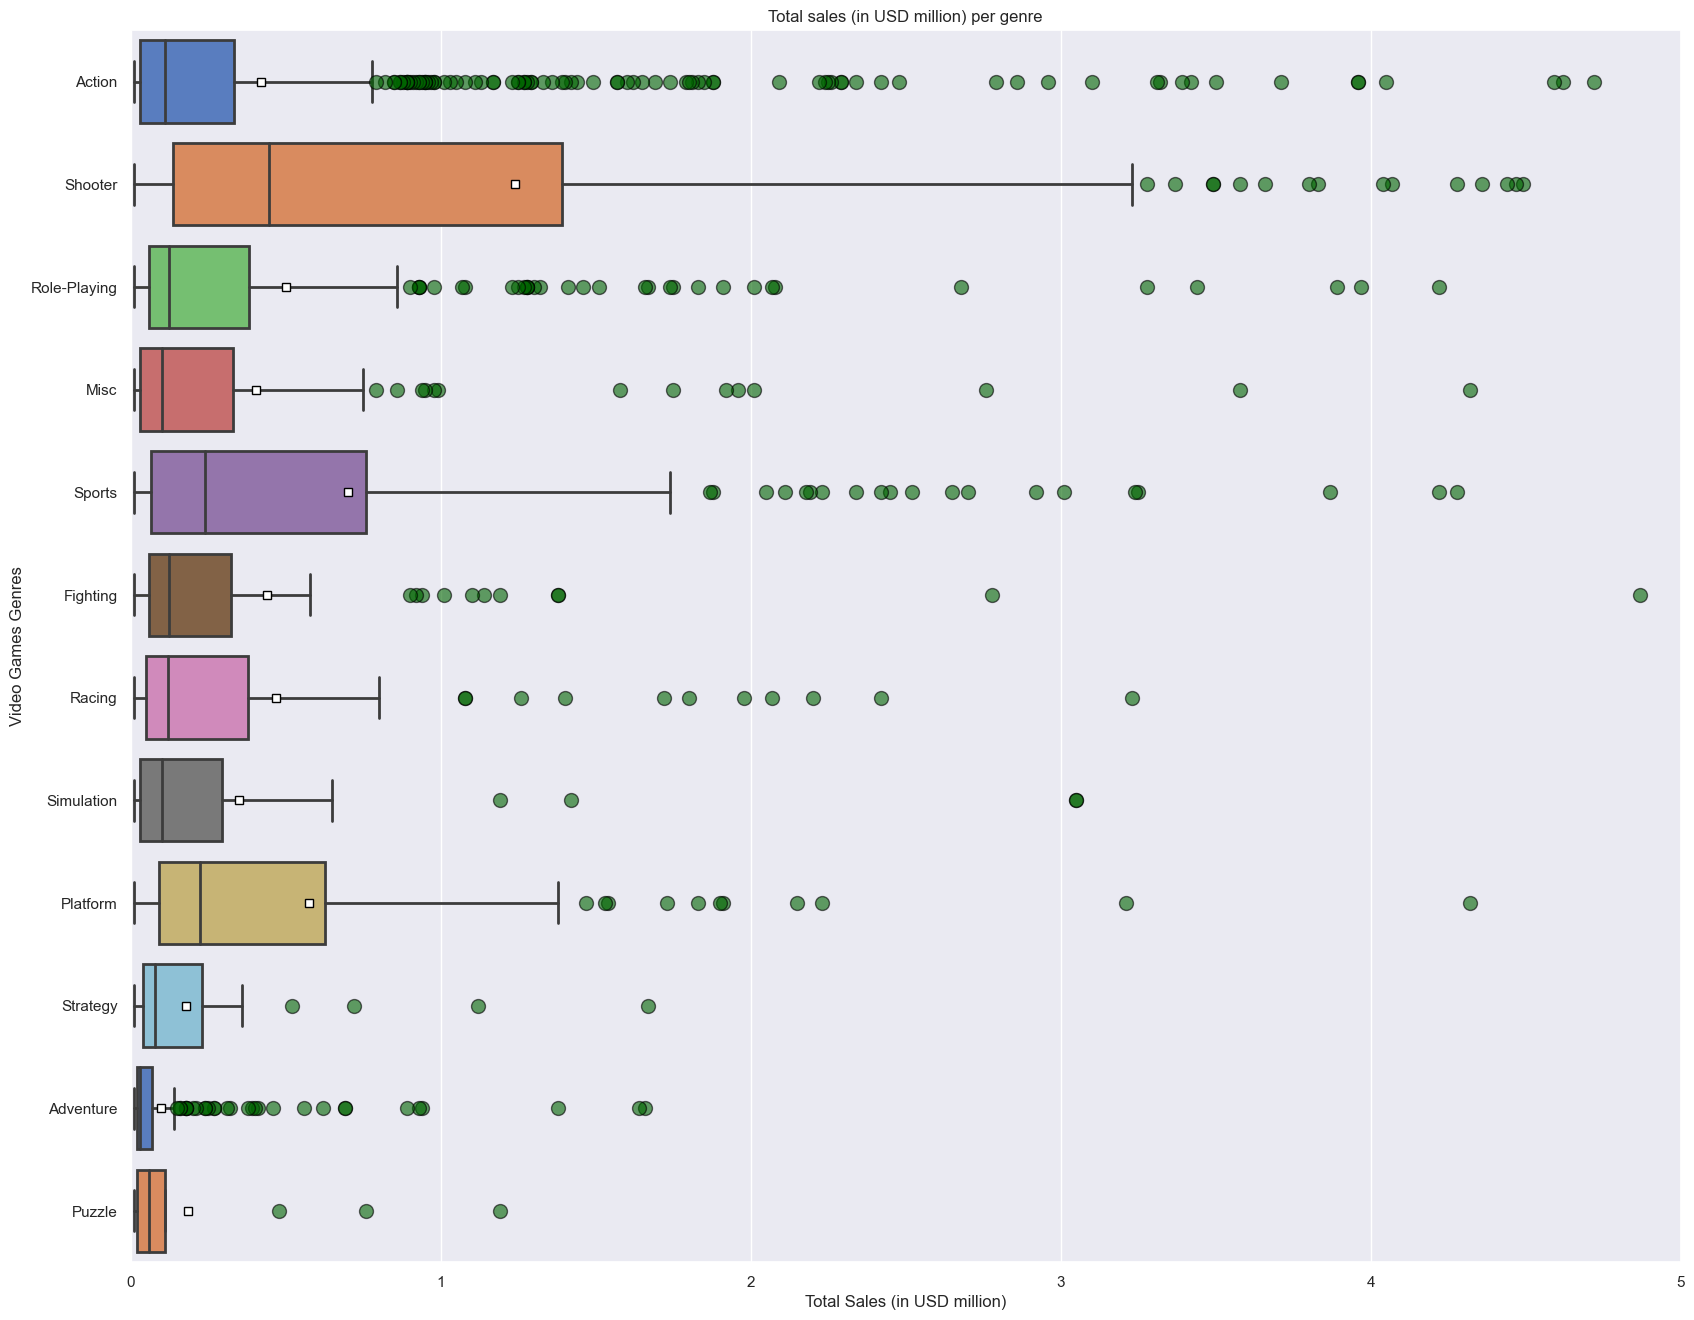

In [127]:
# Plot a boxplot to visualize total sales (in USD million) per genre

# Set box plot style properties
sns.set(rc = {'figure.figsize':(20.0, 16.0)})

my_plot = sns.boxplot(
    data=df_games,
    y='genre',
    x='total_sales',
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='muted')

# Set the plot attributes
my_plot.set(xlabel='Total Sales (in USD million)',
            ylabel='Video Games Genres',
            title='Total sales (in USD million) per genre')
plt.xlim(0, 5)
plt.show()

Based on the descriptive statistics calculated and the boxplot above, for total sales per genre, we can derive the following conclusions:

- **Most Profitable Genres**: **The genre with the highest mean total sales is Shooter**, with a mean of 1.239415 USD million. This indicates that Shooter games, on average, have generated the highest revenue during the given period. **Action and Sports genres also have relatively high mean total sales**, with means of 0.419466 USD million and 0.700791 USD million, respectively.  

- **Genres with High Sales**: **In addition to Shooter, Action, and Sports genres mentioned above, Role-Playing genre also stands out with a mean total sales of 0.499623 USD million**. These genres tend to have higher sales and generate more revenue compared to other genres.

- **Genres with Low Sales**: **Puzzle and Strategy genres have the lowest mean total sales among the listed genres**, with means of 0.186471 USD million and 0.177544 USD million, respectively. These genres generally have lower sales and may appeal to a more specific or niche audience.

- **Sales Variability**: The standard deviation (std) values for each genre reflect the variability in total sales within the genre. **Genres such as Shooter, Role-Playing, and Action have higher standard deviations, indicating a wider range of sales values and potentially more diverse performance across different games within the genre**. On the other hand, genres like Adventure, Puzzle, and Strategy have lower standard deviations, suggesting a more consistent or narrower range of sales.  

- **Range of Sales**: The minimum and maximum values provide insights into the range of sales within each genre. For example, **the Action genre has a minimum sales value of 0.01 USD million and a maximum sales value of 21.05 USD million, indicating a wide range of performance across different Action games**.

# 🔻 Create a user profile for each region <a id='user-profile-for-each-region'></a>  
[← Back to Contents](#contents)

## 🔹 Top five platforms for each region <a id='top-five-platforms'></a>  
[← Back to Contents](#contents)

For each region (NA, EU, JP), let's determine the top five platforms.

In [128]:
# Platforms with sales in NA region
na_sales_grpd_by_platforms = df_games.groupby('platform')['na_sales'].sum()
df_na_sales_grpd_by_platforms = pd.DataFrame(na_sales_grpd_by_platforms)
df_na_sales_grpd_by_platforms = df_na_sales_grpd_by_platforms.sort_values(by='na_sales', ascending=False).reset_index()
df_na_sales_grpd_by_platforms

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.13
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


In [129]:
# Platforms with sales in EU region
eu_sales_grpd_by_platforms = df_games.groupby('platform')['eu_sales'].sum()
df_eu_sales_grpd_by_platforms = pd.DataFrame(eu_sales_grpd_by_platforms)
df_eu_sales_grpd_by_platforms = df_eu_sales_grpd_by_platforms.sort_values(by='eu_sales', ascending=False).reset_index()
df_eu_sales_grpd_by_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.55
4,3DS,30.96
5,PC,25.63
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


In [130]:
# Platforms with sales in JP region
jp_sales_grpd_by_platforms = df_games.groupby('platform')['jp_sales'].sum()
df_jp_sales_grpd_by_platforms = pd.DataFrame(jp_sales_grpd_by_platforms)
df_jp_sales_grpd_by_platforms = df_jp_sales_grpd_by_platforms.sort_values(by='jp_sales', ascending=False).reset_index()
df_jp_sales_grpd_by_platforms

,platform,jp_sales
0,3DS,67.83
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.29
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,DS,0.00


In [131]:
# Platforms with sales in all the other regions
other_sales_grpd_by_platforms = df_games.groupby('platform')['other_sales'].sum()
df_other_sales_grpd_by_platforms = pd.DataFrame(other_sales_grpd_by_platforms)
df_other_sales_grpd_by_platforms = df_other_sales_grpd_by_platforms.sort_values(by='other_sales', ascending=False).reset_index()
df_other_sales_grpd_by_platforms

,platform,other_sales
0,PS4,48.35
1,PS3,26.77
2,XOne,14.27
3,X360,12.11
4,3DS,6.28
5,WiiU,4.69
6,PSV,3.26
7,PC,2.99
8,Wii,1.12
9,DS,0.12


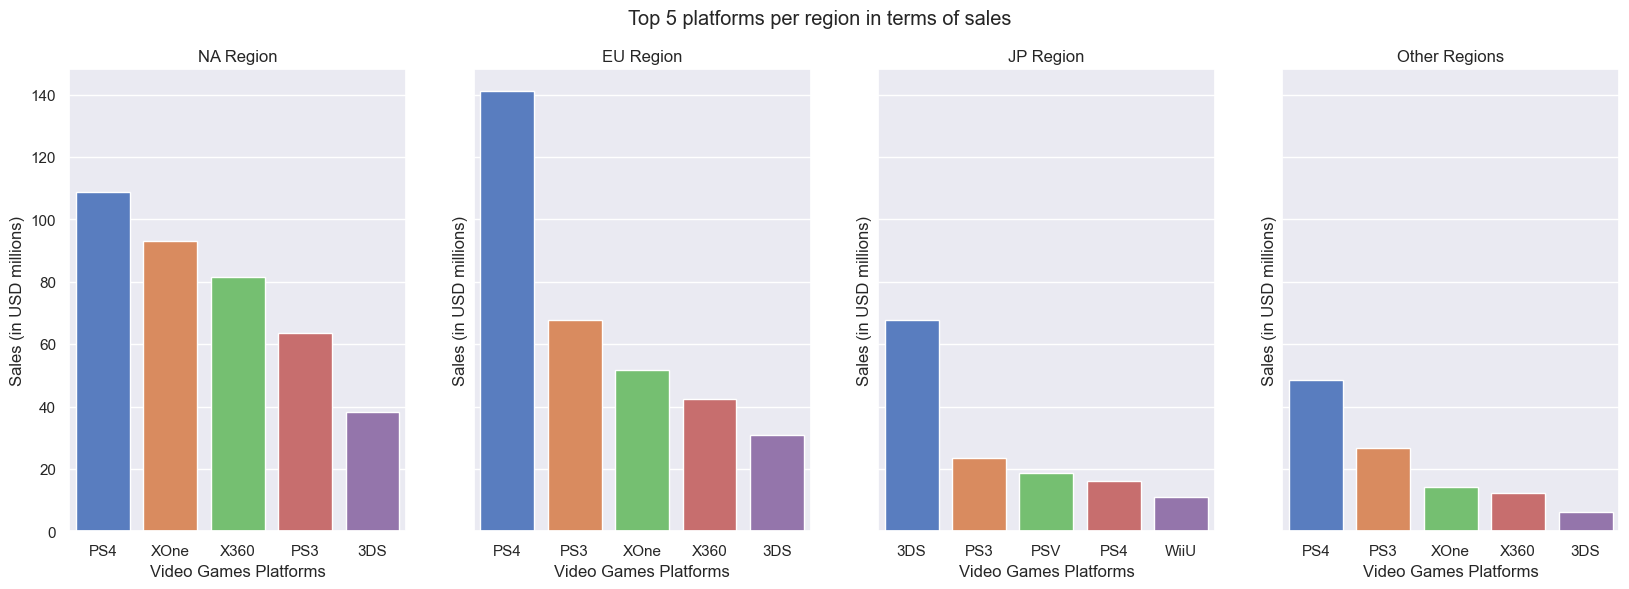

In [132]:
# Plot top five platforms per region in terms of sales
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Top 5 platforms per region in terms of sales')

# Plot a barchart for a DataFrame - df_na_sales_grpd_by_platforms
sns.barplot(ax=axes[0], data=df_na_sales_grpd_by_platforms.head(5), x='platform', y='na_sales', palette='muted')
axes[0].set(title='NA Region',
       xlabel='Video Games Platforms', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_eu_sales_grpd_by_platforms
sns.barplot(ax=axes[1], data=df_eu_sales_grpd_by_platforms.head(5), x='platform', y='eu_sales', palette='muted')
axes[1].set(title='EU Region',
       xlabel='Video Games Platforms', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_jp_sales_grpd_by_platforms
sns.barplot(ax=axes[2], data=df_jp_sales_grpd_by_platforms.head(5), x='platform', y='jp_sales', palette='muted')
axes[2].set(title='JP Region',
       xlabel='Video Games Platforms', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_other_sales_grpd_by_platforms
sns.barplot(ax=axes[3], data=df_other_sales_grpd_by_platforms.head(5), x='platform', y='other_sales', palette='muted')
axes[3].set(title='Other Regions',
       xlabel='Video Games Platforms', 
       ylabel='Sales (in USD millions)')

plt.show()

From the data on platform sales in different regions and the barcharts above, we can conclude the following:

- **The PS4 platform appears to be the most popular and successful in terms of sales across all regions**. It holds the top position in both the North American (NA) and European (EU) regions, and it also performs well in the Japanese (JP) region and other regions. This suggests a strong global presence and popularity for the PS4 platform.

- The XOne platform shows relatively strong sales in the North American region, where it ranks second in sales. However, its performance in the European and Japanese regions is lower, where it ranks third and seventh, respectively. **This indicates that the XOne platform has a stronger presence and appeal in the North American market compared to other regions**.

- **The Nintendo 3DS (3DS) platform performs well in the Japanese region, where it leads in sales**. It also holds a significant position in the North American and European regions, ranking fourth and fifth, respectively.

- **The PC platform shows relatively consistent sales across different regions**. It holds a moderate position in terms of sales in the North American, European, and other regions, ranking sixth, fifth, and seventh, respectively. However, its sales performance in the Japanese region is notably lower, ranking last among the platforms. This indicates that **PC gaming has a more prominent presence in North America and Europe compared to Japan**.

- The sales of other platforms, such as PlayStation 3 (PS3), Xbox 360 (X360), Wii U (WiiU), PlayStation Vita (PSV), Wii, Nintendo DS (DS), and PlayStation Portable (PSP), show varying degrees of success across different regions. Their positions and sales performance differ from one region to another, indicating varying levels of popularity and market demand.

## 🔹 Top five genres for each region <a id='top-five-genres'></a>  
[← Back to Contents](#contents)

For each region (NA, EU, JP), let's determine the top five genres.

In [133]:
# Genres with sales in NA region
na_sales_grpd_by_genres = df_games.groupby('genre')['na_sales'].sum()
df_na_sales_grpd_by_genres = pd.DataFrame(na_sales_grpd_by_genres)
df_na_sales_grpd_by_genres = df_na_sales_grpd_by_genres.sort_values(by='na_sales', ascending=False).reset_index()
df_na_sales_grpd_by_genres

,genre,na_sales
0,Action,126.07
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


In [134]:
# Genres with sales in EU region
eu_sales_grpd_by_genres = df_games.groupby('genre')['eu_sales'].sum()
df_eu_sales_grpd_by_genres = pd.DataFrame(eu_sales_grpd_by_genres)
df_eu_sales_grpd_by_genres = df_eu_sales_grpd_by_genres.sort_values(by='eu_sales', ascending=False).reset_index()
df_eu_sales_grpd_by_genres

,genre,eu_sales
0,Action,118.36
1,Shooter,87.89
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


In [135]:
# Genres with sales in JP region
jp_sales_grpd_by_genres = df_games.groupby('genre')['jp_sales'].sum()
df_jp_sales_grpd_by_genres = pd.DataFrame(jp_sales_grpd_by_genres)
df_jp_sales_grpd_by_genres = df_jp_sales_grpd_by_genres.sort_values(by='jp_sales', ascending=False).reset_index()
df_jp_sales_grpd_by_genres

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.43
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


In [136]:
# Genres with sales in other regions
other_sales_grpd_by_genres = df_games.groupby('genre')['other_sales'].sum()
df_other_sales_grpd_by_genres = pd.DataFrame(other_sales_grpd_by_genres)
df_other_sales_grpd_by_genres = df_other_sales_grpd_by_genres.sort_values(by='other_sales', ascending=False).reset_index()
df_other_sales_grpd_by_genres

,genre,other_sales
0,Action,37.23
1,Shooter,28.77
2,Sports,19.45
3,Role-Playing,11.48
4,Misc,6.09
5,Racing,4.44
6,Platform,4.12
7,Fighting,3.56
8,Adventure,2.43
9,Simulation,1.46


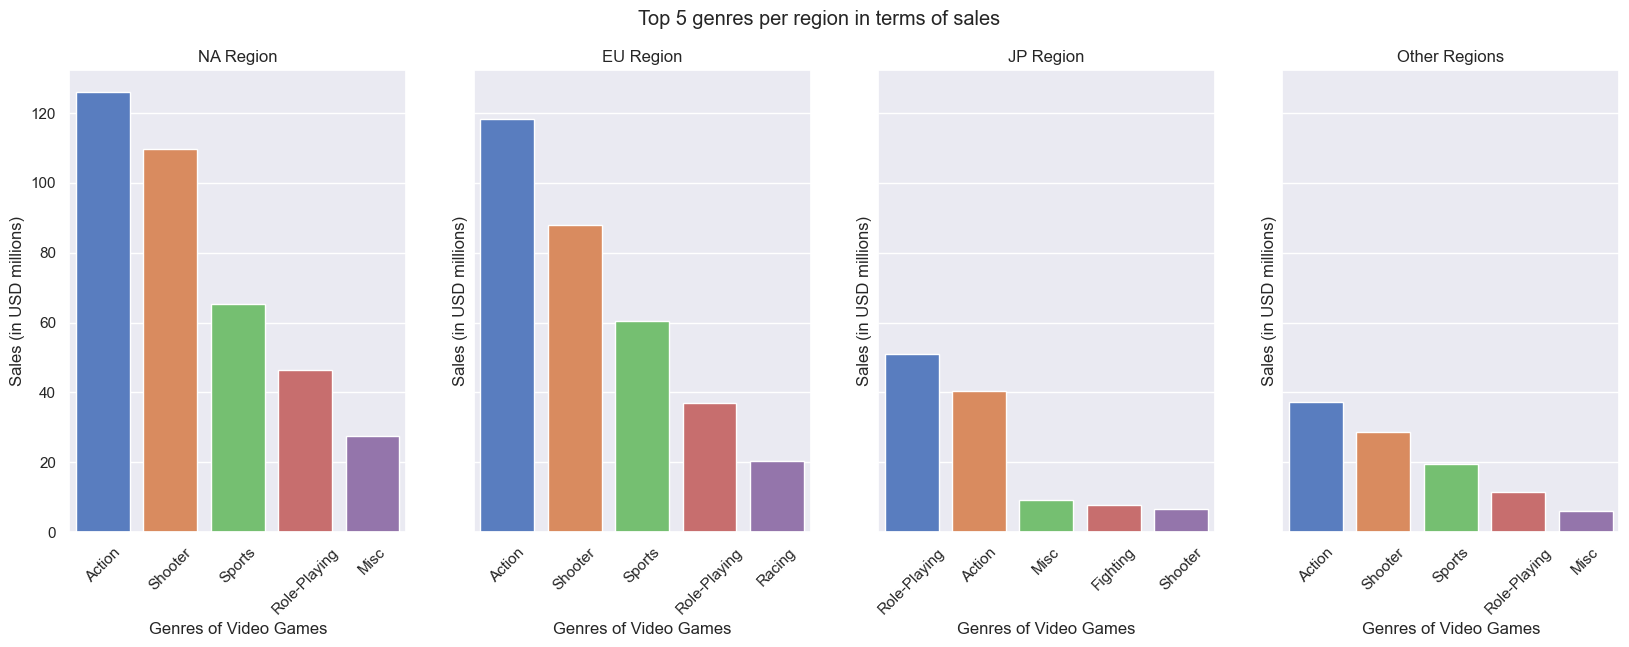

In [137]:
# Plot top five genres per region in terms of sales
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Top 5 genres per region in terms of sales')

# Plot a barchart for a DataFrame - df_na_sales_grpd_by_genres
bar_plot_1 = sns.barplot(ax=axes[0], data=df_na_sales_grpd_by_genres.head(5), x='genre', y='na_sales', palette='muted')
axes[0].set(title='NA Region',
       xlabel='Genres of Video Games', 
       ylabel='Sales (in USD millions)')
bar_plot_1.set_xticklabels(bar_plot_1.get_xticklabels(), rotation=45)

# Plot a barchart for a DataFrame - df_eu_sales_grpd_by_genres
bar_plot_2 = sns.barplot(ax=axes[1], data=df_eu_sales_grpd_by_genres.head(5), x='genre', y='eu_sales', palette='muted')
axes[1].set(title='EU Region',
       xlabel='Genres of Video Games', 
       ylabel='Sales (in USD millions)')
bar_plot_2.set_xticklabels(bar_plot_2.get_xticklabels(), rotation=45)

# Plot a barchart for a DataFrame - df_jp_sales_grpd_by_genres
bar_plot_3 = sns.barplot(ax=axes[2], data=df_jp_sales_grpd_by_genres.head(5), x='genre', y='jp_sales', palette='muted')
axes[2].set(title='JP Region',
       xlabel='Genres of Video Games', 
       ylabel='Sales (in USD millions)')
bar_plot_3.set_xticklabels(bar_plot_3.get_xticklabels(), rotation=45)

# Plot a barchart for a DataFrame - df_other_sales_grpd_by_genres
bar_plot_4 = sns.barplot(ax=axes[3], data=df_other_sales_grpd_by_genres.head(5), x='genre', y='other_sales', palette='muted')
axes[3].set(title='Other Regions',
       xlabel='Genres of Video Games', 
       ylabel='Sales (in USD millions)')
bar_plot_4.set_xticklabels(bar_plot_4.get_xticklabels(), rotation=45)

plt.show()

From the data on genre sales in different regions and the barplots above, we can make several conclusions and observe differences between the regions:  

🔹 **Regional Preferences**:

- **North America (NA)**: The top-selling genres in North America are **Action and Shooter, followed by Sports and Role-Playing**. These genres have the highest sales in the region, indicating **a strong preference for action-packed gameplay experiences**.
- **Europe (EU)**: Similar to North America, Action and Shooter are the leading genres in Europe in terms of sales. Sports and Role-Playing also have significant sales. However, Racing and Misc genres perform relatively better in Europe compared to other regions, suggesting **a specific interest in racing games and a broader range of miscellaneous genres**.
- **Japan (JP)**: In Japan, **Role-Playing takes the lead as the top-selling genre, surpassing Action**. The Japanese market shows **a strong preference for immersive and story-driven Role-Playing games**. Other genres, such as Adventure and Simulation, also have notable sales, indicating a distinct gaming culture and preferences in Japan.
- **Other Regions**: The genre preferences in other regions align more closely with North America and Europe. Action and Shooter genres remain popular, followed by Sports and Role-Playing. However, Racing and Platform genres show relatively lower sales in other regions compared to North America and Europe.

🔹 **Genre-wise Differences**:

- **Action and Shooter**: These genres **consistently perform well across all regions, indicating their widespread popularity**. They appeal to a broad audience and often feature fast-paced gameplay and intense action.
- **Sports and Role-Playing**: Sports games have significant sales in all regions, **highlighting the global appeal of competitive sports**. Role-Playing games, while popular in North America, Europe, and Japan, have comparatively lower sales in other regions.
- **Racing and Platform**: These genres have **higher sales in Europe and North America compared to other regions**. Racing games, **in particular, perform better in Europe, suggesting a regional interest in racing simulations**. 
- **Misc, Adventure, Simulation, and Strategy**: These genres show varying sales across regions. Misc genre performs relatively better in North America and Europe, Adventure genre has consistent sales in all regions, Simulation genre has stronger sales in Europe, and Strategy genre has relatively lower sales overall.  
Overall, the data highlights the varying genre preferences in different regions, influenced by cultural factors, gaming traditions, and audience preferences. Action and Shooter genres have global appeal, while the dominance of Role-Playing in Japan and the interest in Racing in Europe showcase regional differences.


## 🔹 Do ESRB ratings affect sales in individual regions? <a id='esrb-ratings-affect-sales'></a>  
[← Back to Contents](#contents)

Let's calculate total and mean sales grouped by different ESRB ratings.

Great! Now, let's calculate the sum of all the sales grouped by `esrb_rating`:

In [138]:
# Calculate the sum of all the sales grouped by esrb_rating
df_total_sales_grpd_by_ratings = df_games.groupby('esrb_rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
df_total_sales_grpd_by_ratings = df_total_sales_grpd_by_ratings.reset_index()
df_total_sales_grpd_by_ratings

,esrb_rating,na_sales,eu_sales,jp_sales,other_sales
0,E,79.05,83.36,15.14,22.61
1,E10+,54.24,42.69,5.89,12.57
2,M,165.23,145.55,14.11,47.07
3,RP,89.42,78.98,85.07,23.46
4,T,49.79,41.95,20.59,14.29


Now, let's calculate the mean of all the sales grouped by `esrb_rating`:

In [139]:
# Calculate the mean of all the sales grouped by esrb_rating
df_mean_sales_grpd_by_ratings = df_games.groupby('esrb_rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()
df_mean_sales_grpd_by_ratings = df_mean_sales_grpd_by_ratings.reset_index()
df_mean_sales_grpd_by_ratings

,esrb_rating,na_sales,eu_sales,jp_sales,other_sales
0,E,0.261755,0.276026,0.050132,0.074868
1,E10+,0.215238,0.169405,0.023373,0.049881
2,M,0.445364,0.392318,0.038032,0.126873
3,RP,0.091245,0.080592,0.086806,0.023939
4,T,0.149520,0.125976,0.061832,0.042913


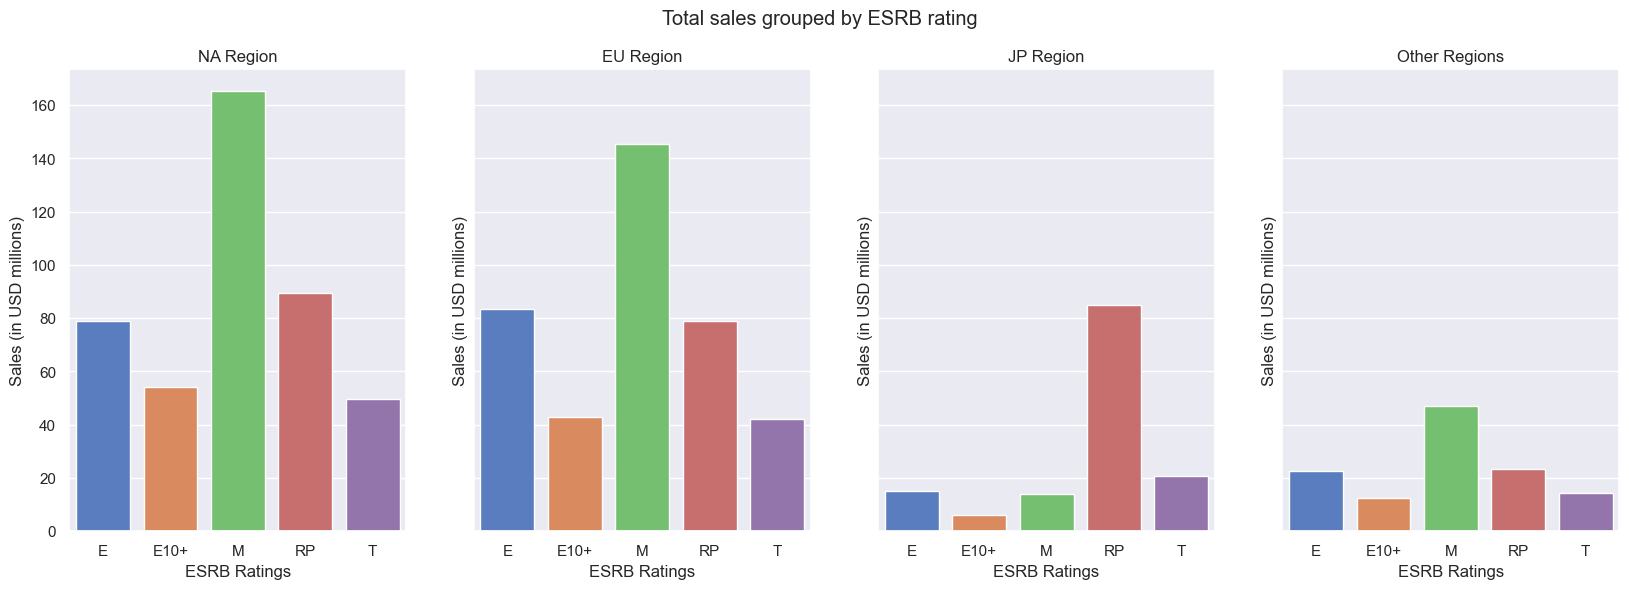

In [140]:
# Plot the sum of all the sales grouped by esrb_rating
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Total sales grouped by ESRB rating')

# Plot a barchart for a DataFrame - df_total_sales_grpd_by_ratings
sns.barplot(ax=axes[0], data=df_total_sales_grpd_by_ratings, x='esrb_rating', y='na_sales', palette='muted')
axes[0].set(title='NA Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_total_sales_grpd_by_ratings
sns.barplot(ax=axes[1], data=df_total_sales_grpd_by_ratings, x='esrb_rating', y='eu_sales', palette='muted')
axes[1].set(title='EU Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_total_sales_grpd_by_ratings
sns.barplot(ax=axes[2], data=df_total_sales_grpd_by_ratings, x='esrb_rating', y='jp_sales', palette='muted')
axes[2].set(title='JP Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_total_sales_grpd_by_ratings
sns.barplot(ax=axes[3], data=df_total_sales_grpd_by_ratings, x='esrb_rating', y='other_sales', palette='muted')
axes[3].set(title='Other Regions',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

plt.show()

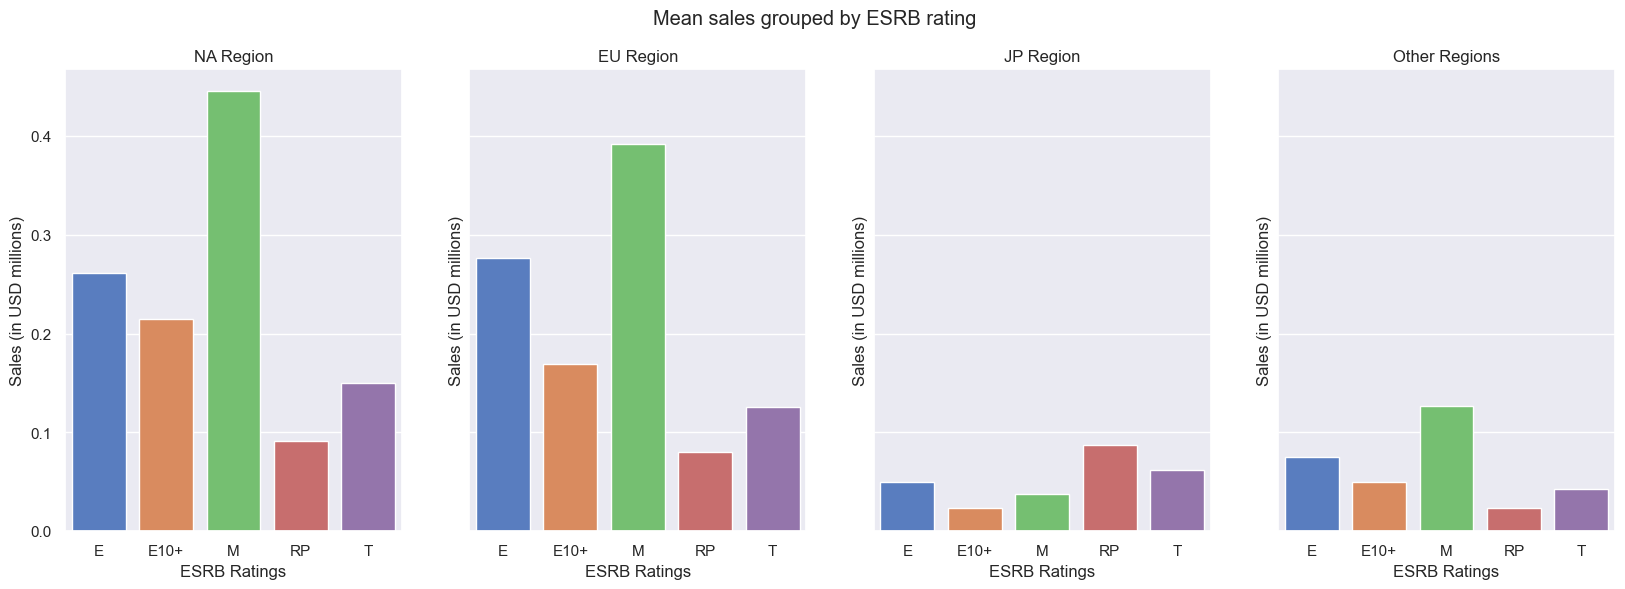

In [141]:
# Plot the mean of all the sales grouped by esrb_rating
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Mean sales grouped by ESRB rating')

# Plot a barchart for a DataFrame - df_mean_sales_grpd_by_ratings
sns.barplot(ax=axes[0], data=df_mean_sales_grpd_by_ratings, x='esrb_rating', y='na_sales', palette='muted')
axes[0].set(title='NA Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_mean_sales_grpd_by_ratings
sns.barplot(ax=axes[1], data=df_mean_sales_grpd_by_ratings, x='esrb_rating', y='eu_sales', palette='muted')
axes[1].set(title='EU Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_mean_sales_grpd_by_ratings
sns.barplot(ax=axes[2], data=df_mean_sales_grpd_by_ratings, x='esrb_rating', y='jp_sales', palette='muted')
axes[2].set(title='JP Region',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

# Plot a barchart for a DataFrame - df_mean_sales_grpd_by_ratings
sns.barplot(ax=axes[3], data=df_mean_sales_grpd_by_ratings, x='esrb_rating', y='other_sales', palette='muted')
axes[3].set(title='Other Regions',
       xlabel='ESRB Ratings', 
       ylabel='Sales (in USD millions)')

plt.show()

From the calculated data on total sales and mean sales grouped by ESRB rating in different regions and the barcharts above, we can draw the following conclusions:  

🔹 **Total Sales by ESRB Rating**: The ESRB rating categories E (Everyone) and M (Mature) have the highest total sales. The ESRB rating E has a total sales value of 200.16 (sum of NA, EU, JP, and other sales), while the ESRB rating M has a total sales value of 371.96. These two rating categories contribute the most to the overall sales.

🔹 **Mean Sales by ESRB Rating**: The mean sales values indicate the average sales per game for each ESRB rating category. In terms of mean sales, the ESRB rating M has the highest values in all regions (NA, EU, JP, and other). This suggests that **games with the Mature rating tend to generate higher sales per game on average**.

🔹 **Influence of ESRB Ratings on Sales in Individual Regions**: When looking at individual regions, the influence of ESRB ratings on sales varies. For example, in North America (NA), games with the ESRB rating M have the highest sales, followed by the ESRB rating E. In Europe (EU), the highest sales are also observed for the ESRB rating M, but the ESRB rating E closely follows. In Japan (JP), the ESRB rating M has the highest sales, while the ESRB rating E and T (Teen) also have significant sales. In other regions, the ESRB rating M leads in sales, but the ESRB rating E and T also contribute.

Overall, **the ESRB ratings have an influence on game sales**, with the Mature rating (M) generally having higher mean sales and significant total sales.

# 🔻 Testing the hypotheses <a id='testing-the-hypotheses'></a>  
[← Back to Contents](#contents)

## 🔹 Compare the user ratings of the Xbox One and PC platforms <a id='xbox-one-and-pc-platforms'></a>  
[← Back to Contents](#contents)

### 1. Null and Alternative hypothesis

Before being able to test the hypothesis, we need to formulate a Null Hypothesis and an Alternative Hypothesis. The null and alternative hypotheses are the two mutually exclusive statements about a parameter or population. The null hypothesis (often abbreviated as `H0`) claims that there is no effect or no difference. The alternative hypothesis (often abbreviated as `H1` or `HA`) is what you want to prove.  

In order to compare the user ratings of the Xbox One and PC platforms, let's formulate both the hypotheses:

**Null hypothesis (H0)**: _Average user ratings on Xbox One is equal to the average user ratings on PC._  

**Alternative hypothesis (H1)**: _Average user ratings on Xbox One is NOT equal to the average user ratings on PC._

### Selection of an appropriate test statistic  

In the given scenario, since we are comparing the means of two independent sample groups - **Xbox One** and **PC platforms**, we will perform a **two-sample t-test**. For performing a two-sample t-test, we can use `ttest_ind()` from `scipy.stats`. This function returns a t-statistic value and a p-value.  

### Selection of the appropriate significance level

When testing hypotheses, we cannot always test it on the whole population but only on randomly selected data samples. Can we, therefore, say that our conclusions are always 100% true for the population? Not really. There are two types of errors that we can make:  

- **Type I error**: Rejecting the null hypothesis when it is true.

- **Type II error**: Accepting the null hypothesis when it is false.  

**Alpha** is **the probability of the type I error and the chance of making a mistake by rejecting the null hypothesis when it is true**. The lower the alpha, the better. It is, therefore, used as a threshold to make decisions.   

For our case, let's select `alpha = 0.05`.

###  Data collection

In [142]:
# Get user ratings for Xbox One platform
xbox_one_user_scores = df_games.query('platform == "XOne"')['user_score']
xbox_one_user_scores = xbox_one_user_scores.dropna()
xbox_one_user_scores

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16542    6.8
16595    6.0
16628    8.2
16641    6.6
16658    6.7
Name: user_score, Length: 182, dtype: float64

In [143]:
# Get user ratings for PC platform
pc_user_scores = df_games.query('platform == "PC"')['user_score']
pc_user_scores = pc_user_scores.dropna()
pc_user_scores

458      3.9
1094     7.9
1350     2.2
1436     6.0
1529     5.4
        ... 
16454    8.3
16461    6.8
16507    7.9
16516    1.4
16690    7.6
Name: user_score, Length: 158, dtype: float64

###  Calculation of the test statistics and the p-value

For performing a two-sample t-test, we can use `ttest_ind()` from `scipy.stats`, as stated earlier.

In [144]:
alpha = 0.05

# Perform the ttest
results = st.ttest_ind(xbox_one_user_scores, pc_user_scores)

print('alpha : ', alpha)
print('p-value : ', results.pvalue)

alpha :  0.05
p-value :  0.11053745405222748


### Decision

To decide on inference, the p-value is compared to the alpha-level (p-value approach):
- Reject the null hypothesis if p-value <= alpha
- Fail to reject the null hypothesis if p-value > alpha

In [145]:
if (results.pvalue < alpha):
    print("We can reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

We cannot reject the null hypothesis.


It means that the hypothesis - **Average user ratings on Xbox One is equal to the average user ratings on PC** is true with the significance level of `0.05`.

### Drill down into the findings

Since we cannot reject the null hypothesis - **Average user ratings on Xbox One is equal to the average user ratings on PC**, let's calculate and compare the mean of the user ratings on Xbox One platform with that of PC platform:

In [146]:
# Calculate mean of the user ratings on Xbox One platform and PC platform
xbox_one_user_scores_mean = np.mean(xbox_one_user_scores)
pc_user_scores_mean = np.mean(pc_user_scores)

print(f'The average user ratings on Xbox One is {xbox_one_user_scores_mean:.2}')
print(f'The average user ratings onPC is {pc_user_scores_mean:.2}')

The average user ratings on Xbox One is 6.5
The average user ratings onPC is 6.3


Interesting! The average user ratings on Xbox One is almost equal to the average user ratings on PC.

## 🔹 Compare the user ratings of the Action and Sports genres <a id='action-and-sports-genres'></a>  
[← Back to Contents](#contents)

### 1. Null and Alternative hypothesis

Before being able to test the hypothesis, we need to formulate a Null Hypothesis and an Alternative Hypothesis. The null and alternative hypotheses are the two mutually exclusive statements about a parameter or population. The null hypothesis (often abbreviated as `H0`) claims that there is no effect or no difference. The alternative hypothesis (often abbreviated as `H1` or `HA`) is what you want to prove.  

In order to compare the user ratings of the Action and Sports genres, let's formulate both the hypotheses:

**Null hypothesis (H0)**: _Average user ratings for Action genre is equal to the average user ratings for Sports genre_  

**Alternative hypothesis (H1)**: _Average user ratings for Action genre is NOT equal to the average user ratings for Sports genre_

### Selection of an appropriate test statistic  

In the given scenario, since we are comparing the means of two independent sample groups - **Action** and **Sports genre**, we will perform a **two-sample t-test**. For performing a two-sample t-test, we can use `ttest_ind()` from `scipy.stats`. This function returns a t-statistic value and a p-value.  

### Selection of the appropriate significance level

When testing hypotheses, we cannot always test it on the whole population but only on randomly selected data samples. Can we, therefore, say that our conclusions are always 100% true for the population? Not really. There are two types of errors that we can make:  

- **Type I error**: Rejecting the null hypothesis when it is true.

- **Type II error**: Accepting the null hypothesis when it is false.  

**Alpha** is **the probability of the type I error and the chance of making a mistake by rejecting the null hypothesis when it is true**. The lower the alpha, the better. It is, therefore, used as a threshold to make decisions.   

For our case, let's select `alpha = 0.05`.

###  Data collection

In [147]:
# Get user ratings for Action genre
action_genre_user_scores = df_games.query('genre == "Action"')['user_score']
action_genre_user_scores = action_genre_user_scores.dropna()
action_genre_user_scores

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16595    6.0
16650    8.5
16652    5.1
16658    6.7
16690    7.6
Name: user_score, Length: 391, dtype: float64

In [148]:
# Get user ratings for Sports genre
sports_genre_user_scores = df_games.query('genre == "Sports"')['user_score']
sports_genre_user_scores = sports_genre_user_scores.dropna()
sports_genre_user_scores

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16140    8.8
16144    6.9
16448    4.5
16516    1.4
16641    6.6
Name: user_score, Length: 160, dtype: float64

###  Calculation of the test statistics and the p-value

For performing a two-sample t-test, we can use `ttest_ind()` from `scipy.stats`, as stated earlier.

In [149]:
alpha = 0.05

# Perform the ttest
results = st.ttest_ind(action_genre_user_scores, sports_genre_user_scores)

print('alpha : ', alpha)
print('p-value : ', results.pvalue)

alpha :  0.05
p-value :  1.108736726777725e-27


### Decision

To decide on inference, the p-value is compared to the alpha-level (p-value approach):
- Reject the null hypothesis if p-value <= alpha
- Fail to reject the null hypothesis if p-value > alpha

In [150]:
if (results.pvalue < alpha):
    print("We can reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

We can reject the null hypothesis.


It means that the alterntive hypothesis - **Average user ratings for Action genre is NOT equal to the average user ratings for Sports genre** is true with the significance level of `0.05`.

# 🔻Conclusion <a id='conclusion'></a>  
[← Back to Contents](#contents)

- **Platform Data**: The dataset includes a wide range of gaming platforms, with the PlayStation 2 (PS2) and Nintendo DS (DS) being the most prevalent. Popular platforms like the PlayStation 3 (PS3), Wii, Xbox 360 (X360), and PlayStation Portable (PSP) are also well-represented.

- **Year of Release Data**: The dataset covers game releases from 1977 to 2016, with higher counts in the mid-2000s to early 2010s. This indicates an active period for game releases during that time, while earlier years have relatively fewer releases.

- **Genre Data**: The dataset includes a diverse range of game genres, with "Action" being the most common. Other popular genres include "Sports," "Role-Playing," "Shooter," and "Misc." Genres like "Adventure," "Racing," "Simulation," and "Platform" also have a significant presence.

- **ESRB Rating Data**: The dataset includes games with various ESRB ratings, with "RP" (Rating Pending) being the most common. "E" (Everyone) and "T" (Teen) are also prevalent. Less common ratings include "E10+" (Everyone 10 and older) and "M" (Mature).

- **Number of Games Released**: The number of games released has generally increased over time, with the late 1990s to early 2000s experiencing a significant rise. The maximum number of games were released in 2008 and 2009.

- **Sales Variation from Platform to Platform**: The PlayStation 2 (PS2) platform has the highest total sales, followed by Xbox 360 (X360) and PlayStation 3 (PS3). Some platforms, like DS, PS, PS2, PS3, Wii, and X360, used to be popular but now have zero sales.

- **Duration of Platforms and Peak Sales**: Newer consoles tend to generate meaningful sales and reach their peak sales faster than older consoles. Newer platforms took around 3-4 years to establish a significant presence, while older platforms took around 7-10 years.

- **Potentially Profitable Platforms (2013-2016)**: PS4 and Xbox One (XOne) were identified as potentially profitable platforms during the specified period. PS3 also maintained notable sales figures. PC had stable sales until 2016.

- **Global Sales of Games by Platform**: Sales data varies across platforms, with different distributions and levels of consistency. PS4 has the highest average sales, followed by Xbox One (XOne) and PS3.

- **Effect of User and Professional Reviews on Sales**: PS4, XOne, and Wii U show a moderate positive correlation between critic scores and total sales, indicating that positive reviews influence sales to a certain degree.

- **Sales of the Same Games on Other Platforms**: Games that were best sellers on PS4 had great sales on XOne and the worst sales on PC.

- **General Distribution of Games by Genre**: Action and Shooter genres are the most profitable in terms of total sales, while Puzzle and Strategy genres have lower sales. Shooter games, on average, generate the highest revenue.
